# Модель оттока клиентов для «Бета-Банка» 

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых. Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет по историческим данным о поведении клиентов и расторжении договоров с банком. 

<u>Цель проекта</u> – построить модель, предсказывающую уход клиента, с предельно большим значением *F1*-меры не ниже 0.59 на тестовой выборке. Дополнительно необходимо рассчитывать *AUC-ROC* и сравнивать её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-признаков" data-toc-modified-id="Анализ-признаков-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Анализ признаков</a></span><ul class="toc-item"><li><span><a href="#tenure-–-сколько-лет-человек-является-клиентом-банка" data-toc-modified-id="tenure-–-сколько-лет-человек-является-клиентом-банка-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span><code>tenure</code> – сколько лет человек является клиентом банка</a></span></li><li><span><a href="#age-–-возраст-клиента" data-toc-modified-id="age-–-возраст-клиента-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span><code>age</code> – возраст клиента</a></span></li><li><span><a href="#credit_score-–-кредитный-рейтинг" data-toc-modified-id="credit_score-–-кредитный-рейтинг-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span><code>credit_score</code> – кредитный рейтинг</a></span></li><li><span><a href="#balance-–-баланс-на-счете" data-toc-modified-id="balance-–-баланс-на-счете-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span><code>balance</code> – баланс на счете</a></span></li><li><span><a href="#estimated_salary-–-предполагаемая-зарплата" data-toc-modified-id="estimated_salary-–-предполагаемая-зарплата-1.1.5"><span class="toc-item-num">1.1.5&nbsp;&nbsp;</span><code>estimated_salary</code> – предполагаемая зарплата</a></span></li><li><span><a href="#geography-–-страна-проживания-клиента" data-toc-modified-id="geography-–-страна-проживания-клиента-1.1.6"><span class="toc-item-num">1.1.6&nbsp;&nbsp;</span><code>geography</code> – страна проживания клиента</a></span></li><li><span><a href="#gender-–-пол-клиента" data-toc-modified-id="gender-–-пол-клиента-1.1.7"><span class="toc-item-num">1.1.7&nbsp;&nbsp;</span><code>gender</code> – пол клиента</a></span></li><li><span><a href="#num_of_products-–--количество-продуктов-банка,-используемых-клиентом" data-toc-modified-id="num_of_products-–--количество-продуктов-банка,-используемых-клиентом-1.1.8"><span class="toc-item-num">1.1.8&nbsp;&nbsp;</span><code>num_of_products</code> –  количество продуктов банка, используемых клиентом</a></span></li><li><span><a href="#has_cr_card-–-наличие-кредитной-карты" data-toc-modified-id="has_cr_card-–-наличие-кредитной-карты-1.1.9"><span class="toc-item-num">1.1.9&nbsp;&nbsp;</span><code>has_cr_card</code> – наличие кредитной карты</a></span></li><li><span><a href="#is_active_member-–-активность-клиента" data-toc-modified-id="is_active_member-–-активность-клиента-1.1.10"><span class="toc-item-num">1.1.10&nbsp;&nbsp;</span><code>is_active_member</code> – активность клиента</a></span></li></ul></li><li><span><a href="#Разбиение-на-выборки" data-toc-modified-id="Разбиение-на-выборки-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Разбиение на выборки</a></span></li><li><span><a href="#Масштабирование-признаков" data-toc-modified-id="Масштабирование-признаков-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Масштабирование признаков</a></span></li></ul></li><li><span><a href="#Моделирование" data-toc-modified-id="Моделирование-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Моделирование</a></span><ul class="toc-item"><li><span><a href="#Дисбаланс-классов" data-toc-modified-id="Дисбаланс-классов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Дисбаланс классов</a></span><ul class="toc-item"><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li></ul></li><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Взвешивание классов</a></span><ul class="toc-item"><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li></ul></li><li><span><a href="#Downsampling" data-toc-modified-id="Downsampling-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Downsampling</a></span><ul class="toc-item"><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li></ul></li><li><span><a href="#Upsampling" data-toc-modified-id="Upsampling-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Upsampling</a></span><ul class="toc-item"><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-2.4.3"><span class="toc-item-num">2.4.3&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li></ul></li></ul></li><li><span><a href="#Выбор-и-тестирование-модели" data-toc-modified-id="Выбор-и-тестирование-модели-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выбор и тестирование модели</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

## Подготовка данных

Подключим необходимые модули, выставим полезные умолчания и зафиксируем `random_state`.

In [1]:
import re
import math as mt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt
import warnings

from time import perf_counter
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (f1_score, roc_auc_score, roc_curve, precision_recall_curve, 
                             RocCurveDisplay, PrecisionRecallDisplay)

plt.style.use('dark_background'); # темный фон графиков
plt.rc('grid', color=(.3, .3, .3)); # бледные линии сетки
plt.rc('axes', grid=True, axisbelow=True); # линии сетки позади графика
pd.set_option('display.max_columns', None); # снимаем ограничение на число выводимых столбцов
pd.options.mode.chained_assignment = None # выключаем SettingWithCopyWarning
warnings.simplefilter('ignore', pd.errors.PerformanceWarning) # выключаем PerformanceWarning

rs = 22221111 # задаем кастомный random_state для проекта

Загрузим данные и взглянем на них.

In [2]:
try:
    df = pd.read_csv("/datasets/Churn.csv")
except:
    df = pd.read_csv(r"D:\datasets\Churn.csv")

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


Приведем названия столбцов к «змеиному» регистру.

In [4]:
df.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', name).lower() for name in df.columns]

Посмотрим на типы данных.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_number        10000 non-null  int64  
 1   customer_id       10000 non-null  int64  
 2   surname           10000 non-null  object 
 3   credit_score      10000 non-null  int64  
 4   geography         10000 non-null  object 
 5   gender            10000 non-null  object 
 6   age               10000 non-null  int64  
 7   tenure            9091 non-null   float64
 8   balance           10000 non-null  float64
 9   num_of_products   10000 non-null  int64  
 10  has_cr_card       10000 non-null  int64  
 11  is_active_member  10000 non-null  int64  
 12  estimated_salary  10000 non-null  float64
 13  exited            10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Пропуски есть только в столбце `tenure` (сколько лет человек является клиентом банка) – разберемся с ними позже.

Сначала убедимся , что в столбце `row_number` действительно номер строки.

In [6]:
(df['row_number'] - df.index - 1).sum()

0

Действительно. Удалим столбец за ненадобностью.

In [7]:
df = df.drop(columns='row_number')
df.shape

(10000, 13)

Проверим, нет ли в датасете дублей – клиентов с одинаковым `customer_id`.

In [8]:
df['customer_id'].duplicated().sum()

0

Дублей нет – смело удаляем столбцы `customer_id` и `surname`, потому что пользы для модели от них не будет.

In [9]:
df = df.drop(columns=['customer_id', 'surname'])
df.shape

(10000, 11)

Прежде чем переходить к анализу фичей (признаков), напишем несколько полезных функций.

In [10]:
# рисует простую гистограмму по столбцу by из датасета
def number_of_clients(by, bins=15, title=None, figsize=(6, 4), numeric=None):
    if title == None: title = by.replace('_', ' ').title() # преобразуем название столбца для использования в заголовке
    if numeric == None: numeric = pd.api.types.is_numeric_dtype(df[by]) # количественный ли столбец by
    
    plt.figure(figsize=figsize);
    if numeric: df[by].hist(bins=bins, edgecolor='k', alpha=.7); # если by – количественный столбец
    else: df.groupby(by)['age'].count().plot(kind='bar', alpha=.7); # если by – категориальный столбец
    plt.suptitle("Number of Clients by " + title);
    plt.xticks(rotation=0);
    plt.xlabel('');
    plt.show();
    if numeric: print(f"{df[by].min()} ≤ {by} ≤ {df[by].max()}");

In [11]:
# рисует две гистограммы плотности по столбцу by из датасета: для ушедших и неушедших клиентов
def density_of_clients(by, bins=15, title=None, figsize=(6, 4), legend='best'):
    if title == None: title = by.replace('_', ' ').title() # преобразуем название столбца для использования в заголовке

    plt.figure(figsize=figsize);
    df.groupby('exited')[by].hist(bins=bins, edgecolor='k', density=True, alpha=.7);
    plt.legend(['Stayed', 'Exited'], loc=legend);
    plt.suptitle("Density of Stayed and Exited Clients by " + title);
    plt.show();

In [12]:
# рисует гистограмму доли ушедших клиентов по столбцу by из датасета
def exit_rate(by, bins=[], xtickstep=None, title=None, figsize=(6, 4), numeric=None):
    if title == None: title = by.replace('_', ' ').title() # преобразуем название столбца для использования в заголовке
    if xtickstep == None: xtickstep = len(bins) // 5 # число корзин между подписями
    if numeric == None: numeric = pd.api.types.is_numeric_dtype(df[by]) # количественный ли столбец by

    bins = list(bins) # границы корзин для разбиения значений столбца by
    color = list(plt.rcParams['axes.prop_cycle'])[1]['color']; # второй цвет в сайклере по умолчанию
    
    plt.figure(figsize=figsize);
    if numeric: # разбиваем столбец by по корзинам bins и считаем долю ушедших клиентов в каждой корзине
        ( 
            df.groupby(pd.cut(df[by], bins, include_lowest=True, right=False, labels=bins[:-1]))['exited'].mean()
            .plot(kind='bar', align='edge', width=1, edgecolor='k', color=color, alpha=.7)
        );
        plt.xticks(ticks=range(0, len(bins)-1, xtickstep));
    else: # считаем долю ушедших клиентов для каждого значения столбца by
        df.groupby(by)['exited'].mean().plot(kind='bar', color=color, alpha=.7);
    plt.suptitle("Client Exit Rate by " + title);
    plt.xticks(rotation=0);
    plt.xlabel('');
    plt.show();

### Анализ признаков

#### `tenure` – сколько лет человек является клиентом банка

Анализ фичей начнем со столбца `tenure`, в котором есть пропуски. Заполним пропуски значением -1, чтобы не потерять их на графике, и посмотрим, как выглядит распределение числа клиентов по `tenure`.

In [13]:
df = df.fillna({'tenure': -1})

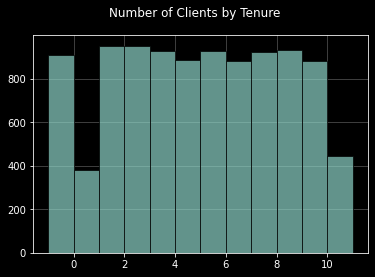

-1.0 ≤ tenure ≤ 10.0


In [14]:
number_of_clients('tenure', bins=range(-1, 12))

Распределение подозрительно равномерное, если не считать пониженные частоты у значений 0 и 10. Посмотрим, влияет ли `tenure` на таргет (целевой признак) – столбец `exited` (флаг ухода клиента). Для этого сравним гистограммы плотности для ушедших и оставшихся клиентов и построим зависимость доли ушедших клиентов от  `tenure`.

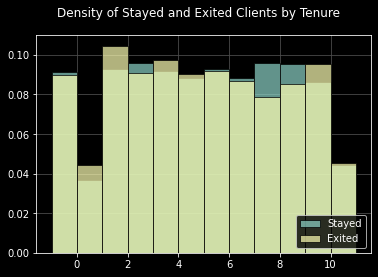

In [15]:
density_of_clients('tenure', bins=range(-1, 12), legend='lower right')

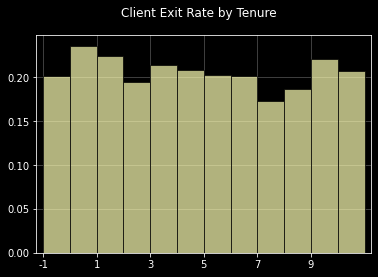

In [16]:
exit_rate('tenure', bins=range(-1, 12))

Распределения ушедших и оставшихся клиентов по `tenure` отличаются незначительно. Доля ушедших клиентов слабо зависит от `tenure` и составляет около 20%. Похоже, этот признак слабо влияет на вероятность ухода и, вероятно, будет только засорять модель.

Чтобы это проверить, клонируем датасет. В оригинальной копии будем *сохранять* фичи с сомнительной полезностью. В клоне же будем оставлять только сильно коррелирующие с таргетом фичи. Модели будем обучать и тестировать параллельно на двух датасетах. В итоге сравним лучшие модели на каждом датасете и сделаем вывод о корректности такой «чистки».

In [17]:
_df = df.copy().drop(columns='tenure') # урезанный клон
_df.shape

(10000, 10)

#### `age` – возраст клиента

Взглянем на распределение клиентов по возрасту и на корреляцию возраста с вероятностью ухода.

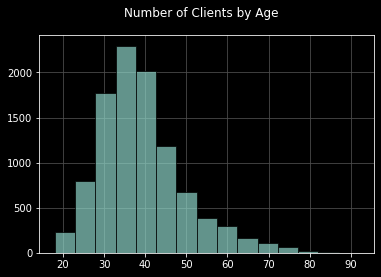

18 ≤ age ≤ 92


In [18]:
number_of_clients('age')

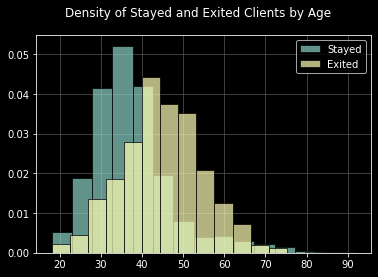

In [19]:
density_of_clients('age')

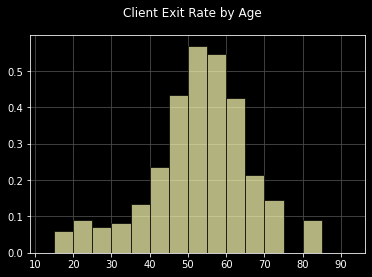

In [20]:
exit_rate('age', bins=range(10, 100, 5), xtickstep=2)

Больше всего клиентов в возрасте от 30 до 40, а вот уходят чаще 40–60-летние. Оставляем фичу в обоих датасетах.

#### `credit_score` – кредитный рейтинг

Теперь посмотрим на распределение клиентов по кредитному рейтингу и на корреляцию последнего с вероятностью ухода.

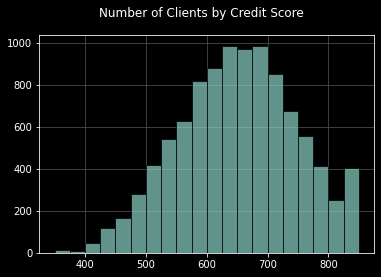

350 ≤ credit_score ≤ 850


In [21]:
number_of_clients('credit_score', bins=20)

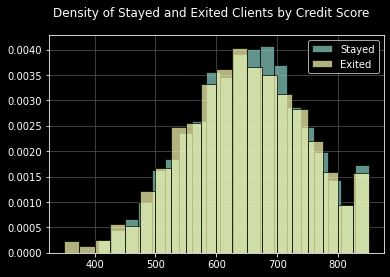

In [22]:
density_of_clients('credit_score', bins=20)

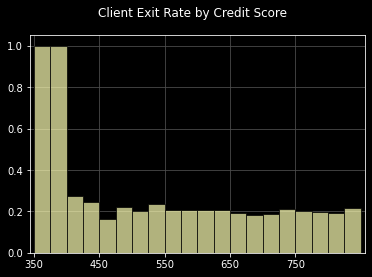

In [23]:
exit_rate('credit_score', bins=range(350, 851, 25))

Распределения ушедших и оставшихся клиентов по кредитному рейтингу почти не отличаются. 100% клиентов с кредитным рейтингом не выше 400 уже не клиенты. Таких, правда, буквально единицы. Доля ушедших среди подавляющего большинства клиентов слабо зависит от кредитного рейтинга, колеблясь в районе 20%. Оставим фичу в основном датасете, а в урезанном вместо нее сделаем флаг `is_low_credit_score`, принимающий значение 1 у клиентов с кредитным рейтингом не выше 400 и 0 у всех остальных клиентов.

In [24]:
_df['is_low_credit_score'] = (_df['credit_score'] <= 400).astype('uint8')

In [25]:
_df = _df.drop(columns='credit_score')
_df.shape

(10000, 10)

####  `balance` – баланс на счете

Следующая фича – баланс на счете.

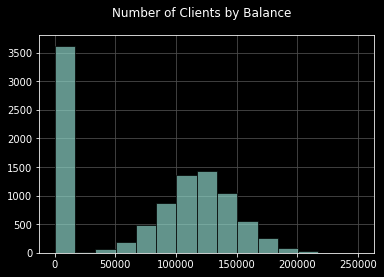

0.0 ≤ balance ≤ 250898.09


In [26]:
number_of_clients('balance')

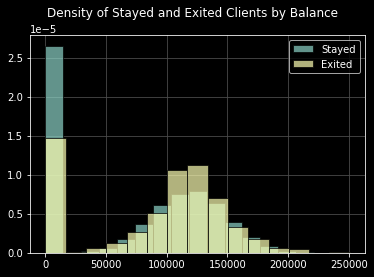

In [27]:
density_of_clients('balance')

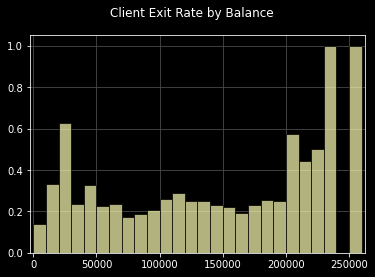

In [28]:
exit_rate('balance', bins=range(0, 260001, 10000))

Вероятность ухода резко возрастает при балансе более 200 000 и менее резко – при балансе меньше 50 000, но больше нуля. Доля ушедших среди клиентов с нулевым балансом, напротив, ниже среднего. Оставляем фичу в обоих датасетах.

#### `estimated_salary` – предполагаемая зарплата

Переходим к предполагаемой зарплате.

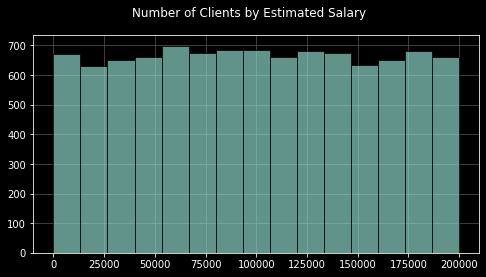

11.58 ≤ estimated_salary ≤ 199992.48


In [29]:
number_of_clients('estimated_salary', figsize=(8, 4))

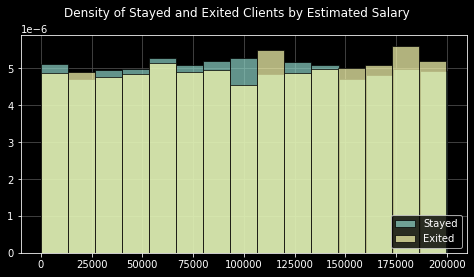

In [30]:
density_of_clients('estimated_salary', figsize=(8, 4), legend='lower right')

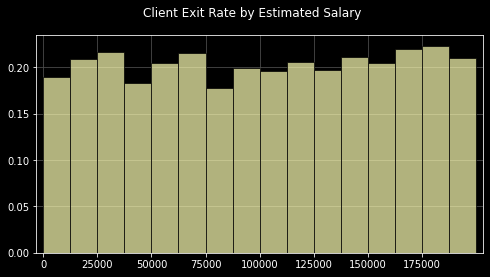

In [31]:
exit_rate('estimated_salary', bins=range(0, 200001, 12500), xtickstep=2, figsize=(8, 4))

Нереалистичное равномерное распределение – с эстимациями у Бета-Банка не очень. Доля ушедших клиентов нечувствительна к предполагаемой зарплате – удаляем фичу из урезанного датасета.

In [32]:
_df = _df.drop(columns='estimated_salary')
_df.shape

(10000, 9)

#### `geography` – страна проживания клиента

На очереди страна проживания.

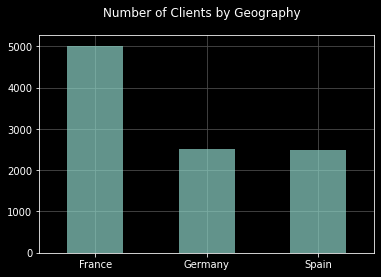

In [33]:
number_of_clients('geography')

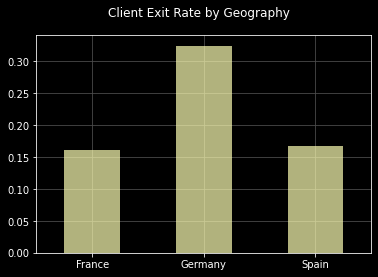

In [34]:
exit_rate('geography')

Доля ушедших среди клиентов из Франции почти такая же, как среди испанских клиентов, и несколько ниже средней. Доля ушедших среди клиентов из Германии в полтора раза выше средней. В основном датасете применим к стране прямое кодирование. В урезанном датасете вместо страны сделаем флаг `is_from_germany`, которым отметим клиентов из Германии.

In [35]:
df = pd.get_dummies(df, columns=['geography'], drop_first=True)
df.shape

(10000, 12)

In [36]:
_df['is_from_germany'] = (_df['geography'] == 'Germany').astype('uint8')
_df = _df.drop(columns='geography')
_df.shape

(10000, 9)

#### `gender` – пол клиента

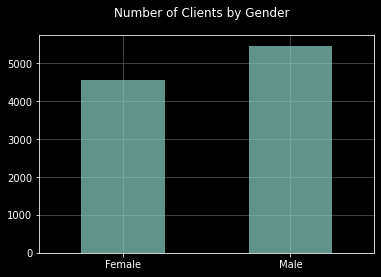

In [37]:
number_of_clients('gender');

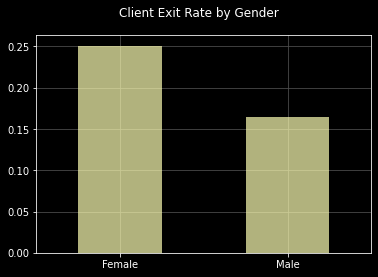

In [38]:
exit_rate('gender')

Среди клиентов банка больше мужчин. Однако доля ушедших заметно выше среди женщин. В обоих датасетах применим прямое кодирование к этому столбцу.

In [39]:
df = pd.get_dummies(df, columns=['gender'], drop_first=True)
df.shape

(10000, 12)

In [40]:
_df = pd.get_dummies(_df, columns=['gender'], drop_first=True)
_df.shape

(10000, 9)

#### `num_of_products` –  количество продуктов банка, используемых клиентом

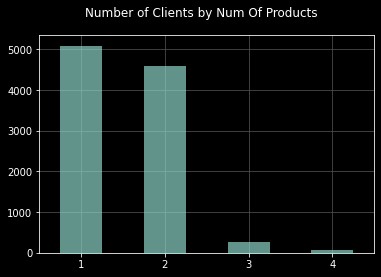

In [41]:
number_of_clients('num_of_products', numeric=False)

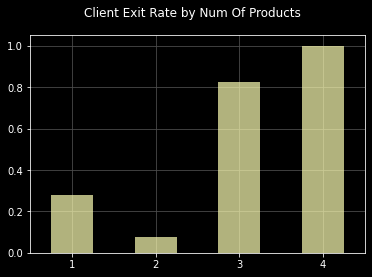

In [42]:
exit_rate('num_of_products', numeric=False)

Подавляющее большинство клиентов имеют в банке не более двух продуктов. Самыми лояльными являются клиенты с двумя продуктами: среди них доля ушедших сильно ниже средней. А вот клиенты с 3–4 продуктами уходят почти все. Оставляем фичу в обоих датасетах.

#### `has_cr_card` – наличие кредитной карты

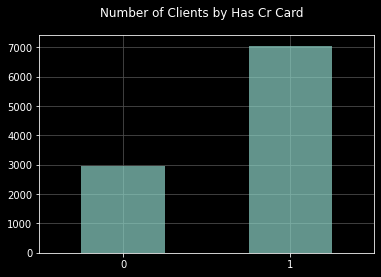

In [43]:
number_of_clients('has_cr_card', numeric=False)

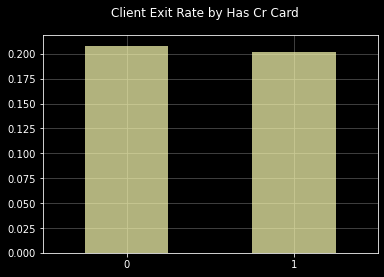

In [44]:
exit_rate('has_cr_card', numeric=False)

Доля ушедших среди клиентов с и без кредитной карты практически одинаковые. Удаляем фичу из урезанного датасета.

In [45]:
_df = _df.drop(columns='has_cr_card')
_df.shape

(10000, 8)

#### `is_active_member` – активность клиента

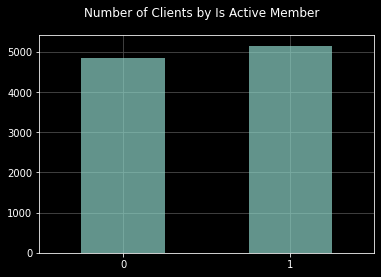

In [46]:
number_of_clients('is_active_member', numeric=False)

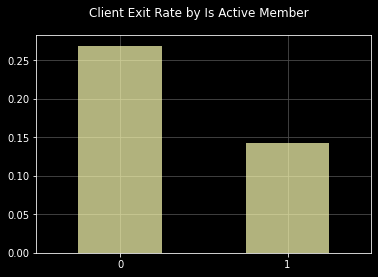

In [47]:
exit_rate('is_active_member', numeric=False)

Доля ушедших среди неактивных клиентов вдвое выше, чем среди активных. Оставляем фичу в обоих датасетах.

### Разбиение на выборки

Отделим от каждого датасета целевой признак (таргет) и разобъем результат на обучающую, валидационную и тестовую выборки в пропорции 3:1:1.

In [48]:
y = df['exited']
X = df.drop(columns='exited')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, stratify=y, random_state=rs)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=.5, stratify=y_test, random_state=rs)

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(6000, 11) (6000,)
(2000, 11) (2000,)
(2000, 11) (2000,)


In [49]:
_X = _df.drop(columns='exited')
_X_train = _X.loc[X_train.index, :]
_X_valid = _X.loc[X_valid.index, :]
_X_test = _X.loc[X_test.index, :]

print(_X_train.shape)
print(_X_valid.shape)
print(_X_test.shape)

(6000, 7)
(2000, 7)
(2000, 7)


Проверим качество стратификации выборок по таргету.

In [50]:
print(y.mean())
print(y_train.mean())
print(y_valid.mean())
print(y_test.mean())

0.2037
0.20366666666666666
0.2035
0.204


Доля ушедших клиентов в выборках отличается не более чем на 0,05 пп. при среднем значении 20% – отличный результат.

### Масштабирование признаков

Отмасштабируем количественные признаки в обоих датасетах, используя `StandardScaler` библиотеки `scikit-learn`.

In [51]:
# количественные фичи в основном датасете
numeric = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary'] 

# обучаем скейлер на обучающей выборке
scaler = StandardScaler().fit(X_train[numeric]) 

# масштабируем количественные фичи во всех трех выборках
X_train[numeric] = scaler.transform(X_train[numeric])
X_valid[numeric] = scaler.transform(X_valid[numeric])
X_test[numeric] = scaler.transform(X_test[numeric])

# проверяем результат
X_test.describe().T[['mean', 'std', 'min', 'max']]

,mean,std,min,max
credit_score,-0.006763,1.005876,-3.043461,2.069219
age,0.024374,1.002944,-1.992699,4.320071
tenure,0.030647,1.011370,-1.675053,1.718761
balance,-0.016293,0.980084,-1.225054,2.167200
num_of_products,0.020406,1.025537,-0.909095,4.264381
has_cr_card,0.712500,0.452710,0.000000,1.000000
is_active_member,0.494000,0.500089,0.000000,1.000000
estimated_salary,0.000624,0.989346,-1.730914,1.735812
geography_Germany,0.245500,0.430491,0.000000,1.000000
geography_Spain,0.245500,0.430491,0.000000,1.000000


In [52]:
# количественные фичи в урезанном датасете
numeric = ['age', 'balance', 'num_of_products']

# обучаем скейлер на обучающей выборке
scaler = StandardScaler().fit(_X_train[numeric]) 

# масштабируем количественные фичи во всех трех выборках
_X_train[numeric] = scaler.transform(_X_train[numeric])
_X_valid[numeric] = scaler.transform(_X_valid[numeric])
_X_test[numeric] = scaler.transform(_X_test[numeric])

# проверяем результат
_X_test.describe().T[['mean', 'std', 'min', 'max']]

,mean,std,min,max
age,0.024374,1.002944,-1.992699,4.320071
balance,-0.016293,0.980084,-1.225054,2.167200
num_of_products,0.020406,1.025537,-0.909095,4.264381
is_active_member,0.494000,0.500089,0.000000,1.000000
is_low_credit_score,0.000500,0.022361,0.000000,1.000000
is_from_germany,0.245500,0.430491,0.000000,1.000000
gender_Male,0.541500,0.498399,0.000000,1.000000


## Моделирование

Далее будем тестировать три модели: дерево решений, случайный лес и логистическую регрессию. Напишем универсальную функцию, которая перебирает гиперпараметры и возвращает модель, показавшую лучшую метрику `F1` на валидационной выборке.

In [53]:
def find_best_model(estimator, X_train, y_train, X_valid, y_valid, X_test=None, y_test=None, 
                    max_depth=range(1, 16), n_estimators=range(10, 101, 10), 
                    penalty=['l1', 'l2', 'elasticnet', 'none'], 
                    solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 
                    class_weight=None, silent=False):

    if X_test is None: X_test = X_valid
    if y_test is None: y_test = y_valid
    
    if estimator == 'tree':
        estimator_name = 'Decision Tree Classifier'
        plot_title = f'{estimator_name} F1 & ROC AUC Scores & Fitting Time vs Max Depth'
        hyparams1 = [0]
        hyparams2 = list(max_depth)
    
    elif estimator == 'forest':
        estimator_name = 'Random Forest Classifier'
        plot_title = f'{estimator_name} F1 & ROC AUC Scores vs Number of Estimators & Max Depth'
        hyparams1 = list(n_estimators)
        hyparams2 = list(max_depth)
    
    elif estimator == 'logit':
        estimator_name = 'Logistic Regressor'
        plot_title = f'{estimator_name} F1 & ROC AUC Scores vs Solver Algorithm & Penalty Norm'
        if isinstance(penalty, list): hyparams1 = penalty
        else: hyparams1 = [penalty]
        if isinstance(solver, list): hyparams2 = solver
        else: hyparams2 = [solver]
   
    else: 
        return None, None, None
    
    best_score = 0
    scores = {'f1': [], 'roc_auc': []} # метрики перебираемых моделей
    times = [] # время обучения перебираемых моделей

# перебираем гиперпараметры
    for hyparam1 in hyparams1: 
        for hyparam2 in hyparams2: 
            
            if estimator == 'tree':
                model = DecisionTreeClassifier(max_depth=hyparam2, class_weight=class_weight, random_state=rs)
            elif estimator == 'forest':
                model = RandomForestClassifier(max_depth=hyparam2, n_estimators=hyparam1, 
                                               class_weight=class_weight, n_jobs=-1, random_state=rs)
            elif estimator == 'logit':
                if hyparam1 == 'elasticnet': l1_ratio = .5
                else: l1_ratio = None
                model = LogisticRegression(penalty=hyparam1, solver=hyparam2, max_iter=10000, l1_ratio=l1_ratio, 
                                           class_weight=class_weight, n_jobs=-1, random_state=rs)

            # обучаем на обучающей
            try: # для обработки не сочетающихся penalty и solver в LogisticRegression()
                t0 = perf_counter()
                model.fit(X_train, y_train) 
                times.append(perf_counter() - t0)
            except ValueError:
                scores['f1'].append(np.nan) 
                scores['roc_auc'].append(np.nan)
                times.append(np.nan)
                continue

            # тестируем на валидационной
            scores['f1'].append(f1_score(y_valid, model.predict(X_valid))) 
            scores['roc_auc'].append(roc_auc_score(y_valid, model.predict_proba(X_valid)[:, 1]))

            # сохраняем лучшую модель
            if scores['f1'][-1] > best_score:
                best_score = scores['f1'][-1]
                best_time = times[-1]
                best_model = model

# визуализируем перебор гиперпараметров
    if not silent:
        if estimator == 'tree':
            colors = [x['color'] for x in plt.rcParams['axes.prop_cycle']] # цвета палитры по умолчанию

            fig, ax1 = plt.subplots(figsize=(8, 5));
            fig.suptitle(plot_title, fontsize='x-large', y=.97);

            ax2 = ax1.twinx(); # вторая ось ординат
            ax2.grid(False); # выключаем линии сетки второй оси

            ax1.plot(hyparams2, scores['f1'], color=colors[0]);
            ax1.plot(hyparams2, scores['roc_auc'], color=colors[0], linestyle='--');
            ax2.plot(hyparams2, times, color=colors[1]);

            ax1.set_ylim(0, 1);
            ax2.set_ylim(0);

            ax1.set_xlabel('Max Depth');
            ax1.set_ylabel('Scores', color=colors[0]);
            ax1.legend(['F1', 'ROC AUC'], loc='upper left')
            ax2.set_ylabel('Fitting Time', color=colors[1]);

        elif estimator in ['forest', 'logit']:
            fig, ax = plt.subplots(1, 2, figsize=(16, 5));
            fig.suptitle(plot_title, fontsize='x-large');

            sns.heatmap(
                np.array(scores['f1']).reshape(len(hyparams1), len(hyparams2)).T, # превращаем список в матрицу
                xticklabels=hyparams1, annot=True, fmt=".3f", cbar=False, ax=ax[0]
            );
            sns.heatmap(
                np.array(scores['roc_auc']).reshape(len(hyparams1), len(hyparams2)).T, 
                xticklabels=hyparams1, annot=True, fmt=".3f", cbar=False, ax=ax[1]
            );

            ax[0].set(title='F1 Score');
            ax[1].set(title='ROC AUC Score');

            for ax in ax:
                ax.set_yticklabels(hyparams2, rotation='horizontal');
                if estimator == 'forest': ax.set(xlabel='Number of Estimators', ylabel='Max Depth');
                elif estimator == 'logit': ax.set(xlabel='Penalty', ylabel='Solver');

        plt.show();
    
# выводим характеристики лучшей модели на тестовой выборке
    ypp_test = best_model.predict_proba(X_test)[:, 1]
    yp_test = best_model.predict(X_test)
    
    fpr, tpr, _ = roc_curve(y_test, ypp_test)
    precision, recall, _ = precision_recall_curve(y_test, ypp_test)
    
    f1 = f1_score(y_test, yp_test)
    roc_auc = roc_auc_score(y_test, ypp_test)
    
    if not silent:
        print(f"The Best {estimator_name}:")
        print(f"\tFitting Time\t{best_time:.3f}")
        print(f"\tF1 Score\t{f1:.3f}")
        print(f"\tROC AUC Score\t{roc_auc:.3f}")

        if estimator == 'tree':
            print(f"\tTree Depth\t{best_model.get_depth()}")

        elif estimator == 'forest':
            print(f"\tNumber of Trees\t{best_model.get_params()['n_estimators']}")
            print(f"\tMax Tree Depth\t{best_model.get_params()['max_depth']}")

        elif estimator == 'logit':
            print(f"\tPenalty Norm\t{best_model.get_params()['penalty']}")
            print(f"\tSolver Algo\t{best_model.get_params()['solver']}")

        _, ax = plt.subplots(1, 2, figsize=(16, 5));
        RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=estimator_name).plot(ax[0]);
        PrecisionRecallDisplay(precision=precision, recall=recall).plot(ax[1]);

        ax[0].set(xlim=(-.05, 1.05), ylim=(-.05, 1.05), title=f"ROC Curve of the Best {estimator_name}")
        ax[1].set(xlim=(-.05, 1.05), ylim=(-.05, 1.05), title=f"Precision-Recall Curve of the Best {estimator_name}")

        plt.show();

    return best_model, f1, roc_auc

Метрики лучших моделей на каждом этапе будем записывать в специальный датафрейм.

In [54]:
summary = pd.DataFrame(columns=pd.MultiIndex.from_product([['F1', 'ROC AUC'], ['Valid', 'Test']]),
                       index=pd.MultiIndex.from_product([['Unbal', 'Wght', 'Down', 'Up'], 
                                                        ['Tree', 'Forest', 'Logit'], ['Full', 'Cut']])).astype('float32')

Как мы помним, в исходном датасете имеется существенный дисбаланс классов: доля ушедших клиентов составляет около 20%, то есть объектов класса 1 вчетверо меньше объектов класса 0. На первом этапе будем обучать модели на обучающей выборке как есть, не изменяя баланс классов. 

### Дисбаланс классов

#### Дерево решений

Найдем лучшее дерево решений для полного и урезанного датасетов.

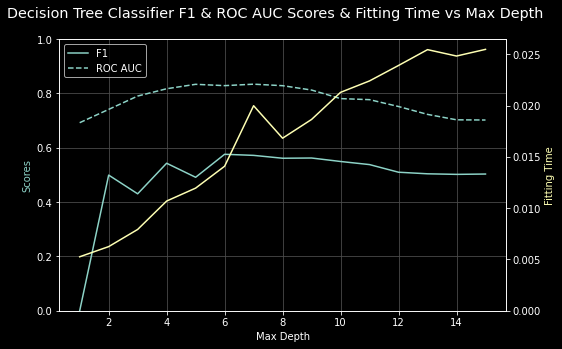

The Best Decision Tree Classifier:
	Fitting Time	0.014
	F1 Score	0.576
	ROC AUC Score	0.828
	Tree Depth	6


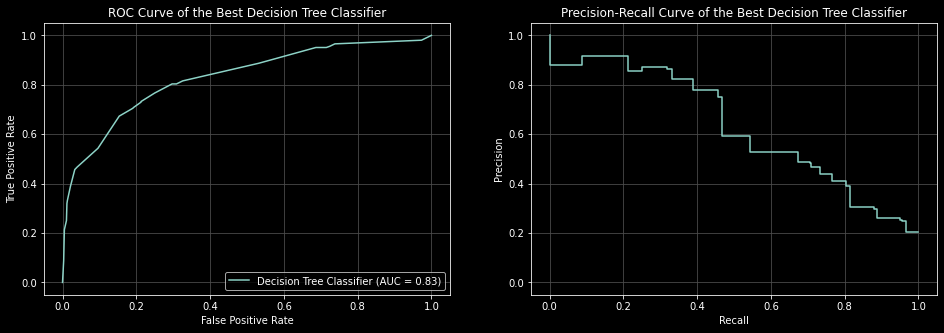

In [55]:
(_, summary.loc[('Unbal', 'Tree', 'Full'), ('F1', 'Valid')], 
 summary.loc[('Unbal', 'Tree', 'Full'), ('ROC AUC', 'Valid')]) = find_best_model('tree', 
                                                                                 X_train, y_train, 
                                                                                 X_valid, y_valid)

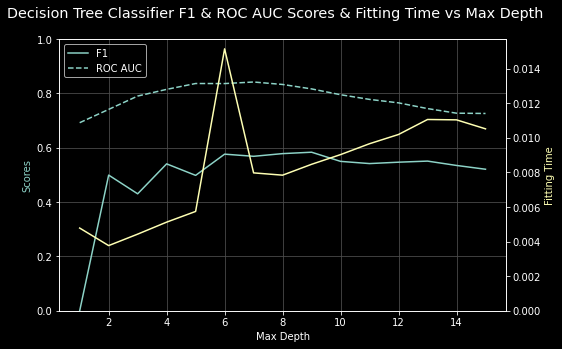

The Best Decision Tree Classifier:
	Fitting Time	0.008
	F1 Score	0.583
	ROC AUC Score	0.816
	Tree Depth	9


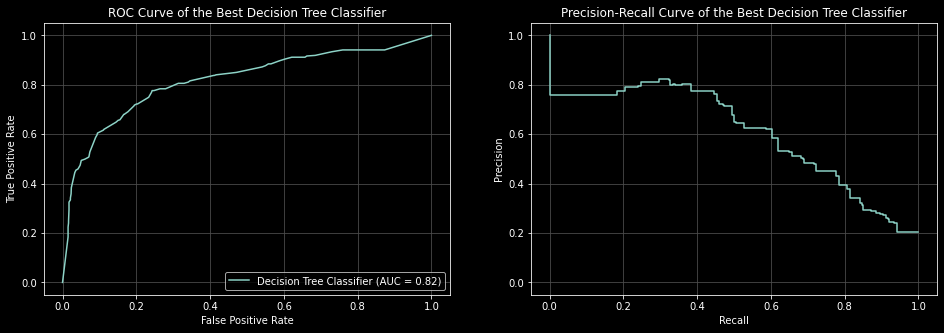

In [56]:
(_, summary.loc[('Unbal', 'Tree', 'Cut'), ('F1', 'Valid')], 
 summary.loc[('Unbal', 'Tree', 'Cut'), ('ROC AUC', 'Valid')]) = find_best_model('tree', 
                                                                                _X_train, y_train, 
                                                                                _X_valid, y_valid)

In [57]:
summary.iloc[:6].style.background_gradient(subset='F1', axis=None).background_gradient(subset='ROC AUC', axis=None)

Дерево решений на урезанном датасете более глубокое, чем на полном, на валидационной выборке показывает более высокую метрику F1, но менее высокую ROC AUC.

#### Случайный лес

>*Здесь и далее для сокращения объема и повышения читаемости проекта множество перебираемых гиперпараметров случайного леса уже подобрано заранее для каждого случая*

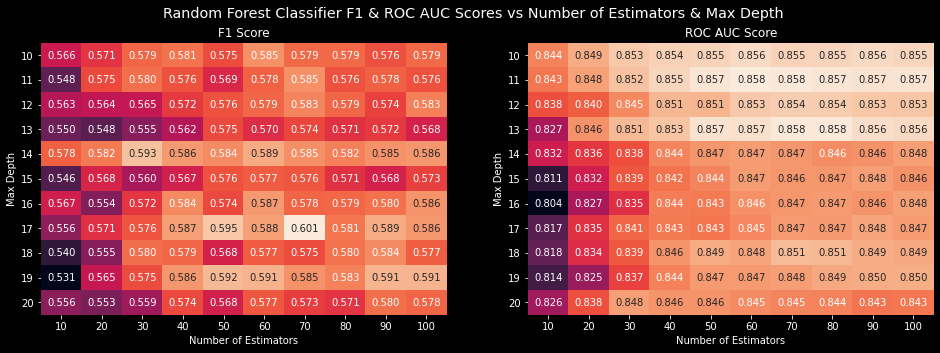

The Best Random Forest Classifier:
	Fitting Time	0.427
	F1 Score	0.601
	ROC AUC Score	0.847
	Number of Trees	70
	Max Tree Depth	17


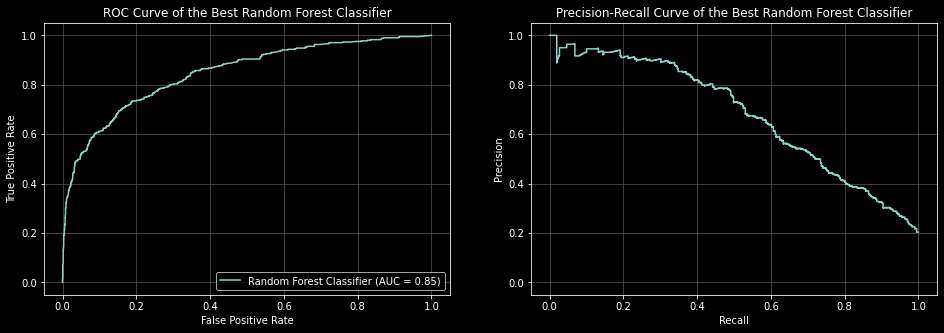

In [58]:
(_, summary.loc[('Unbal', 'Forest', 'Full'), ('F1', 'Valid')], 
 summary.loc[('Unbal', 'Forest', 'Full'), ('ROC AUC', 'Valid')]) = find_best_model('forest', 
                                                                                   X_train, y_train, 
                                                                                   X_valid, y_valid, 
                                                                                   max_depth=range(10, 21), 
                                                                                   n_estimators=range(10, 101, 10))

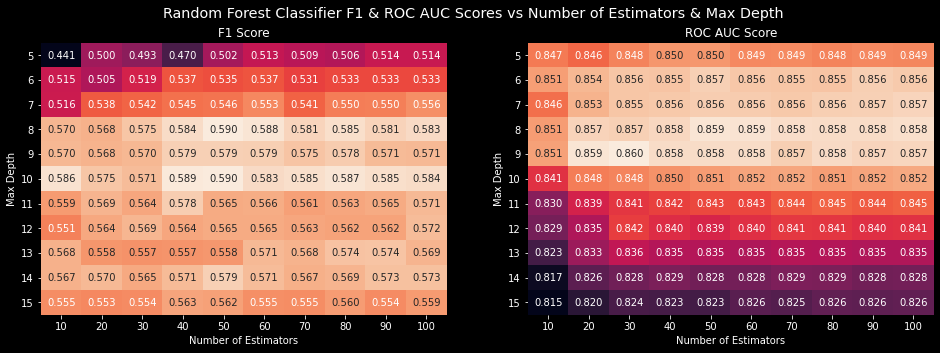

The Best Random Forest Classifier:
	Fitting Time	0.159
	F1 Score	0.590
	ROC AUC Score	0.851
	Number of Trees	50
	Max Tree Depth	10


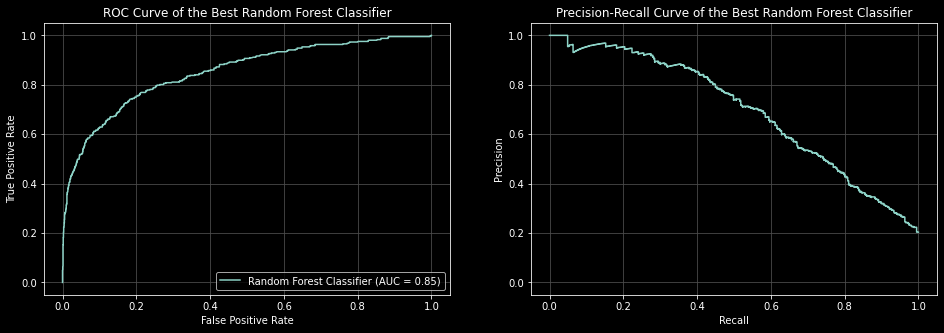

In [59]:
(_, summary.loc[('Unbal', 'Forest', 'Cut'), ('F1', 'Valid')], 
 summary.loc[('Unbal', 'Forest', 'Cut'), ('ROC AUC', 'Valid')]) = find_best_model('forest', 
                                                                                  _X_train, y_train, 
                                                                                  _X_valid, y_valid, 
                                                                                   max_depth=range(5, 16), 
                                                                                   n_estimators=range(10, 101, 10))

In [60]:
summary.iloc[:6].style.background_gradient(subset='F1', axis=None).background_gradient(subset='ROC AUC', axis=None)

Модели случайного леса на обоих датасетах показали более высокие метрики на валидационной выборке, чем модели дерева решений. Модель на урезанном датасете теперь, наоборот, более простая, чем модель на полном датасете, и показывает меньшую метрику F1, но более высокую ROC AUC.

#### Логистическая регрессия

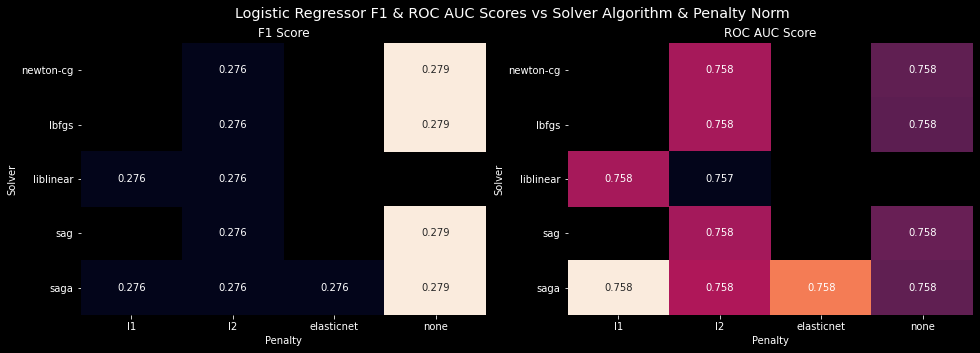

The Best Logistic Regressor:
	Fitting Time	0.382
	F1 Score	0.279
	ROC AUC Score	0.758
	Penalty Norm	none
	Solver Algo	newton-cg


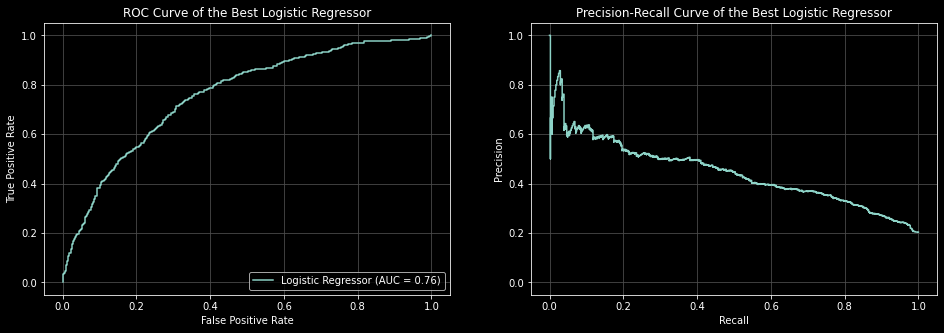

In [61]:
(_, summary.loc[('Unbal', 'Logit', 'Full'), ('F1', 'Valid')], 
 summary.loc[('Unbal', 'Logit', 'Full'), ('ROC AUC', 'Valid')]) = find_best_model('logit', 
                                                                                  X_train, y_train, 
                                                                                  X_valid, y_valid)

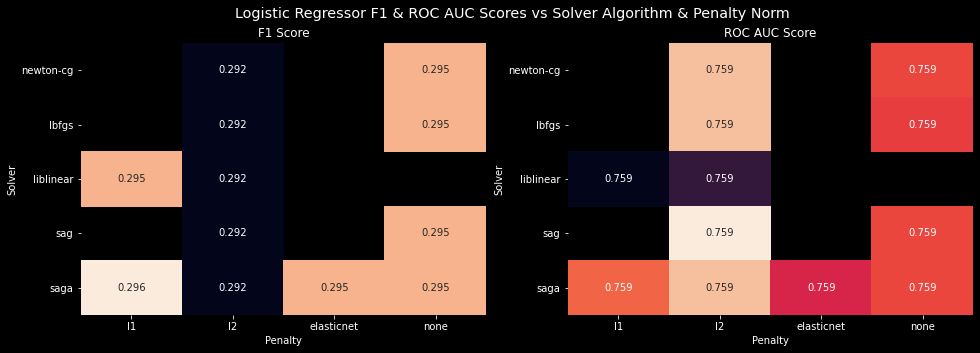

The Best Logistic Regressor:
	Fitting Time	0.247
	F1 Score	0.296
	ROC AUC Score	0.759
	Penalty Norm	l1
	Solver Algo	saga


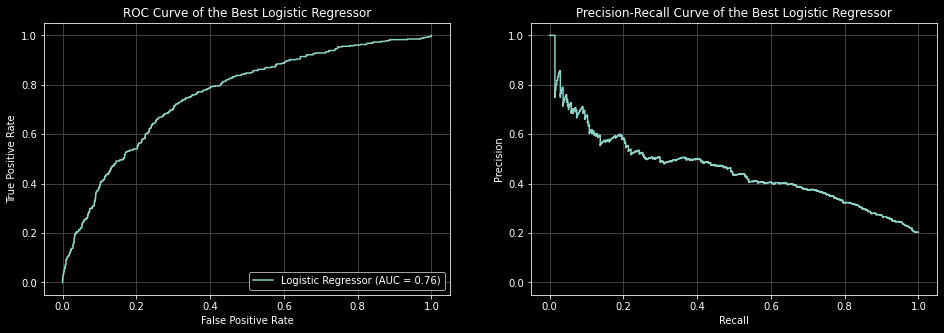

In [62]:
(_, summary.loc[('Unbal', 'Logit', 'Cut'), ('F1', 'Valid')], 
 summary.loc[('Unbal', 'Logit', 'Cut'), ('ROC AUC', 'Valid')]) = find_best_model('logit', 
                                                                                 _X_train, y_train, 
                                                                                 _X_valid, y_valid)

In [63]:
summary.iloc[:6].style.background_gradient(subset='F1', axis=None).background_gradient(subset='ROC AUC', axis=None)

Модели логистической регрессии на обоих датасетах показали худшие результаты на валидационной выборке. Однако обе метрики модели на урезанном датасете выше, чем на полном.

### Взвешивание классов

Для учета дисбаланса классов сначала попробуем просто их взвесить внутри самих моделей, указав параметр `class_weight='balanced'` при инициализации.

#### Дерево решений

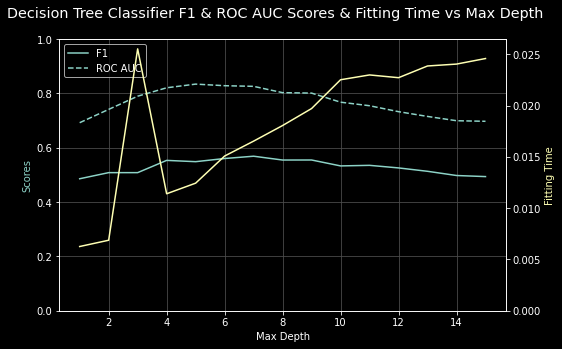

The Best Decision Tree Classifier:
	Fitting Time	0.017
	F1 Score	0.569
	ROC AUC Score	0.826
	Tree Depth	7


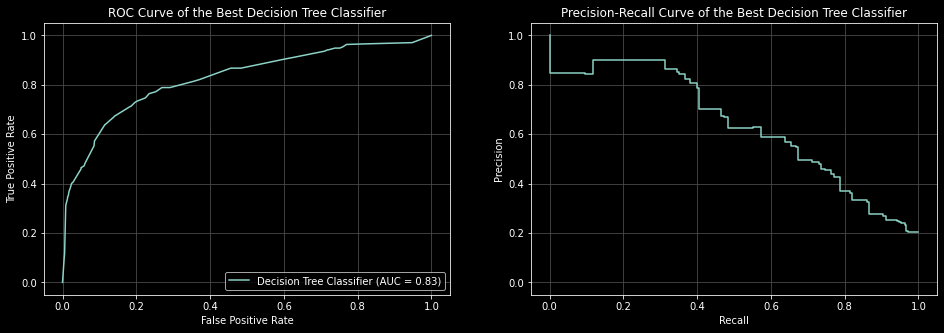

In [64]:
(_, summary.loc[('Wght', 'Tree', 'Full'), ('F1', 'Valid')], 
 summary.loc[('Wght', 'Tree', 'Full'), ('ROC AUC', 'Valid')]) = find_best_model('tree', 
                                                                                X_train, y_train, 
                                                                                X_valid, y_valid,
                                                                                class_weight='balanced')

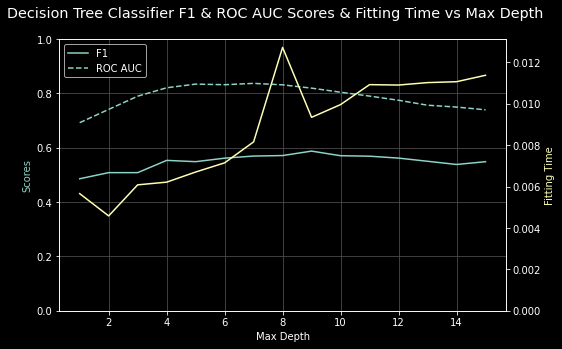

The Best Decision Tree Classifier:
	Fitting Time	0.009
	F1 Score	0.588
	ROC AUC Score	0.819
	Tree Depth	9


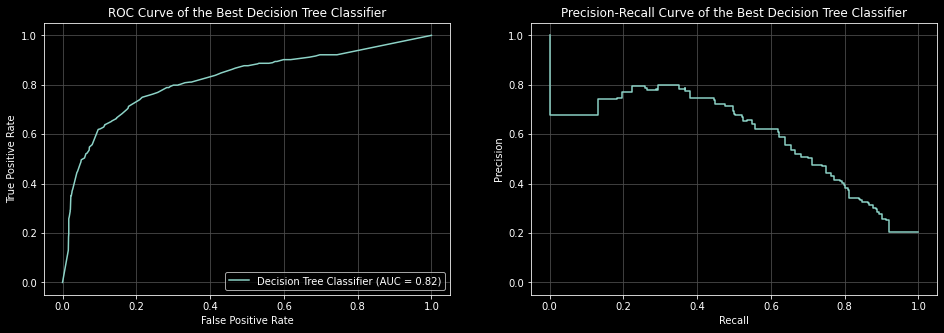

In [65]:
(_, summary.loc[('Wght', 'Tree', 'Cut'), ('F1', 'Valid')], 
 summary.loc[('Wght', 'Tree', 'Cut'), ('ROC AUC', 'Valid')]) = find_best_model('tree', 
                                                                               _X_train, y_train, 
                                                                               _X_valid, y_valid,
                                                                               class_weight='balanced')

In [66]:
summary.iloc[:12].style.background_gradient(subset='F1', axis=None).background_gradient(subset='ROC AUC', axis=None)

Дереву решений взвешивание классов помогло несильно: на урезанном датасете обе метрики на валидационной выборке немого подросли, а на полном датасете, наоборот, немного снизились. Однако метрика F1 теперь не так сильно зависит от глубины дерева.

#### Случайный лес

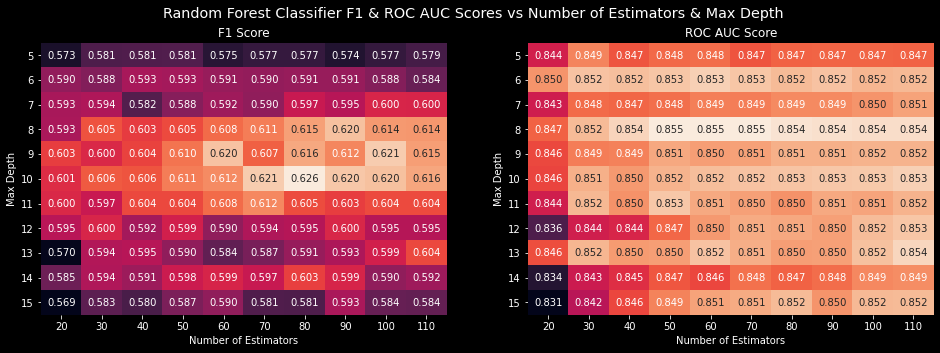

The Best Random Forest Classifier:
	Fitting Time	0.401
	F1 Score	0.626
	ROC AUC Score	0.853
	Number of Trees	80
	Max Tree Depth	10


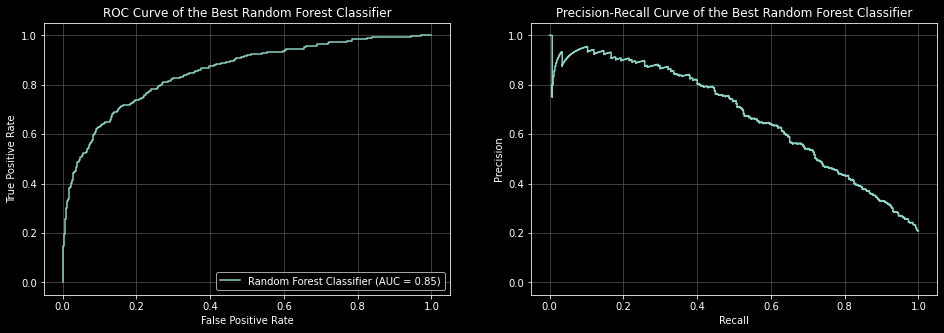

In [67]:
(_, summary.loc[('Wght', 'Forest', 'Full'), ('F1', 'Valid')], 
 summary.loc[('Wght', 'Forest', 'Full'), ('ROC AUC', 'Valid')]) = find_best_model('forest', 
                                                                                  X_train, y_train, 
                                                                                  X_valid, y_valid, 
                                                                                  max_depth=range(5, 16), 
                                                                                  n_estimators=range(20, 111, 10),
                                                                                  class_weight='balanced')

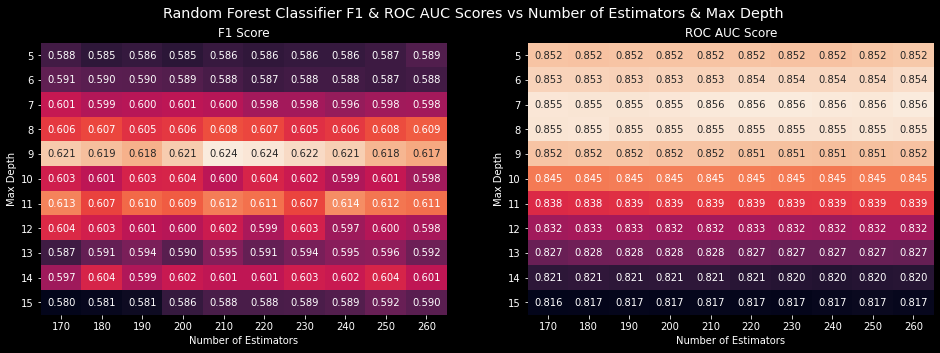

The Best Random Forest Classifier:
	Fitting Time	0.620
	F1 Score	0.624
	ROC AUC Score	0.852
	Number of Trees	210
	Max Tree Depth	9


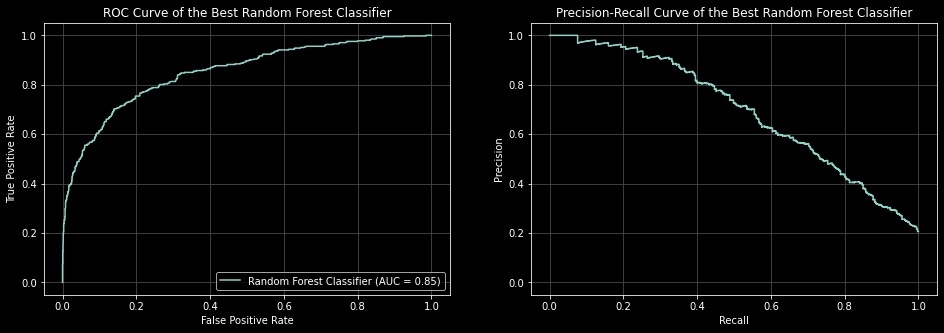

In [68]:
(_, summary.loc[('Wght', 'Forest', 'Cut'), ('F1', 'Valid')], 
 summary.loc[('Wght', 'Forest', 'Cut'), ('ROC AUC', 'Valid')]) = find_best_model('forest', 
                                                                                 _X_train, y_train, 
                                                                                 _X_valid, y_valid, 
                                                                                 max_depth=range(5, 16), 
                                                                                 n_estimators=range(170, 261, 10),
                                                                                 class_weight='balanced')

In [69]:
summary.iloc[:12].style.background_gradient(subset='F1', axis=None).background_gradient(subset='ROC AUC', axis=None)

Модели случайного леса со взвешенными классами на обоих датасетах показали более высокие метрики на валидационной выборке, чем модели без взвешивания. Обе метрики здесь несколько выше у модели на полном датасете.

#### Логистическая регрессия

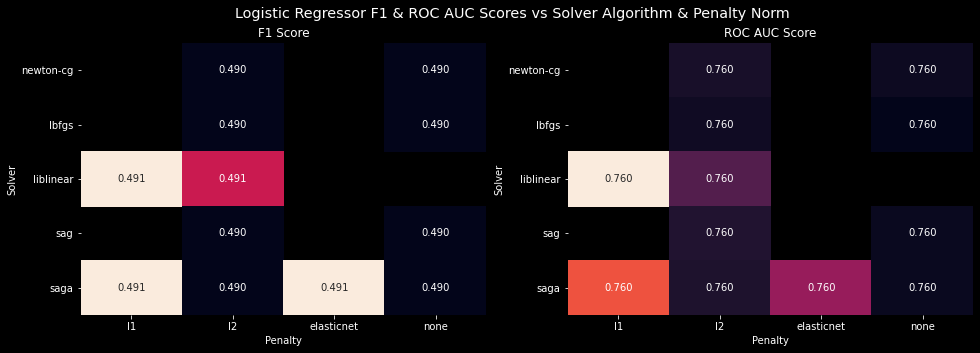

The Best Logistic Regressor:
	Fitting Time	0.026
	F1 Score	0.491
	ROC AUC Score	0.760
	Penalty Norm	l1
	Solver Algo	liblinear


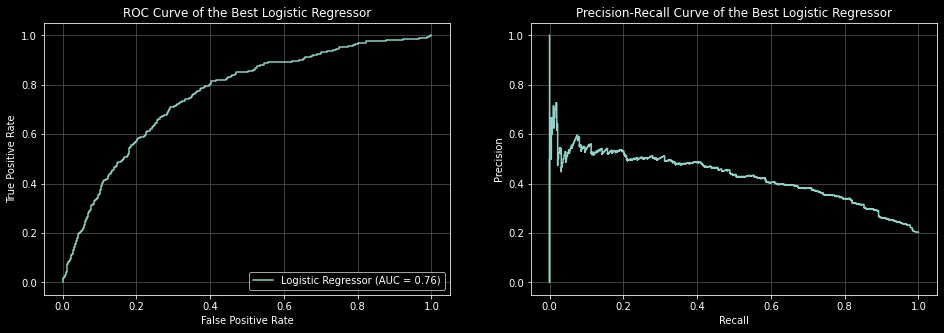

In [70]:
(_, summary.loc[('Wght', 'Logit', 'Full'), ('F1', 'Valid')], 
 summary.loc[('Wght', 'Logit', 'Full'), ('ROC AUC', 'Valid')]) = find_best_model('logit', 
                                                                                 X_train, y_train, 
                                                                                 X_valid, y_valid,
                                                                                 class_weight='balanced')

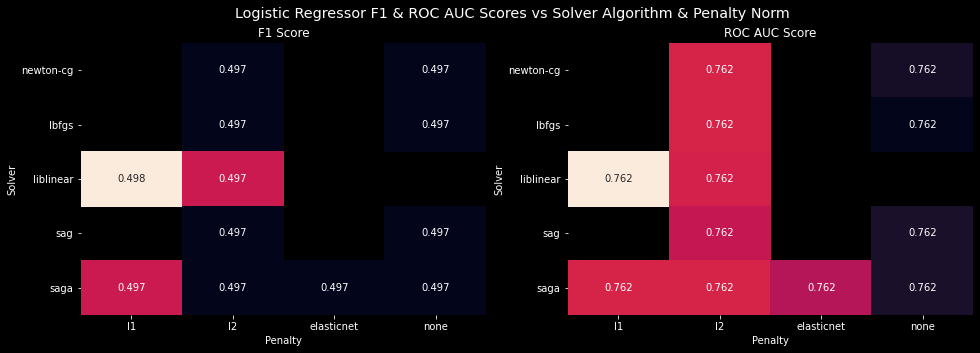

The Best Logistic Regressor:
	Fitting Time	0.010
	F1 Score	0.498
	ROC AUC Score	0.762
	Penalty Norm	l1
	Solver Algo	liblinear


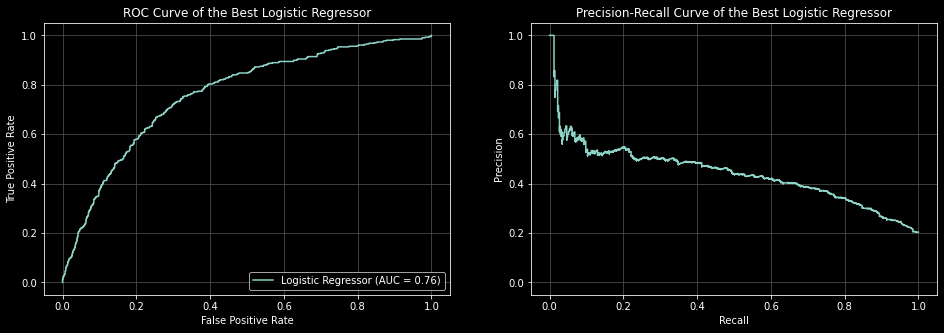

In [71]:
(_, summary.loc[('Wght', 'Logit', 'Cut'), ('F1', 'Valid')], 
 summary.loc[('Wght', 'Logit', 'Cut'), ('ROC AUC', 'Valid')]) = find_best_model('logit', 
                                                                                _X_train, y_train, 
                                                                                _X_valid, y_valid,
                                                                                class_weight='balanced')

In [72]:
summary.iloc[:12].style.background_gradient(subset='F1', axis=None).background_gradient(subset='ROC AUC', axis=None)

Модели логистической регрессии со взвешенными классами на обоих датасетах показали гораздо более высокую метрику F1 на валидационной выборке, чем модели без взвешивания. Немного увеличилась у них и метрика ROC AUC. Тем не менее они по-прежнему остаются аутсайдерами.

### Downsampling

Теперь протестируем технику downsampling: уравняем частотность классов, удалив лишние объекты класса 0 из обучающей выборки. 

In [73]:
X_train_down = shuffle(pd.concat([X_train[y_train == 1], 
                                  X_train[y_train == 0].sample(n=len(X_train[y_train == 1]), random_state=rs)]), 
                       random_state=rs)

y_train_down = y_train[X_train_down.index]
_X_train_down = _X_train.loc[X_train_down.index, :]

print(X_train_down.shape, y_train_down.shape)
print(_X_train_down.shape)

(2444, 11) (2444,)
(2444, 7)


Проверим новый баланс классов.

In [74]:
print(y_train_down.mean())

0.5


#### Дерево решений

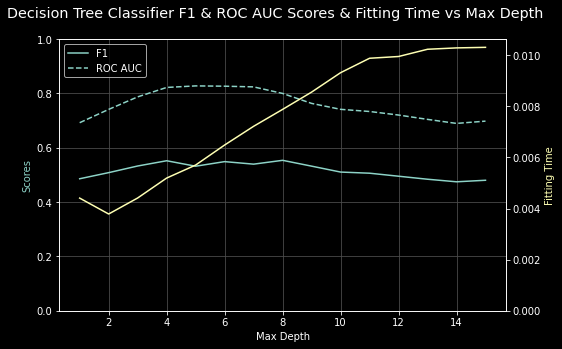

The Best Decision Tree Classifier:
	Fitting Time	0.008
	F1 Score	0.554
	ROC AUC Score	0.800
	Tree Depth	8


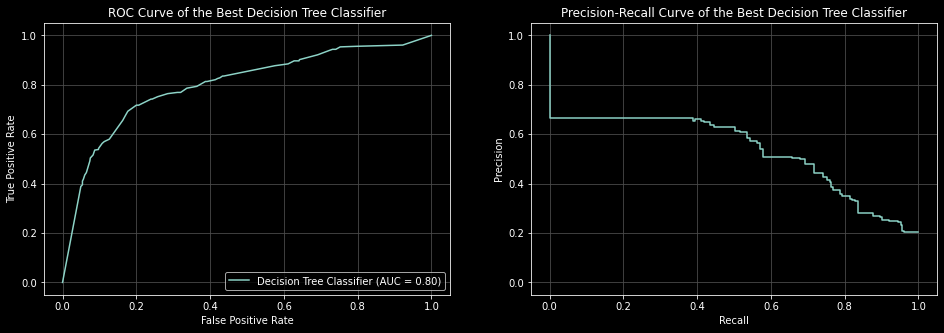

In [75]:
(_, summary.loc[('Down', 'Tree', 'Full'), ('F1', 'Valid')], 
 summary.loc[('Down', 'Tree', 'Full'), ('ROC AUC', 'Valid')]) = find_best_model('tree', 
                                                                                X_train_down, y_train_down, 
                                                                                X_valid, y_valid)

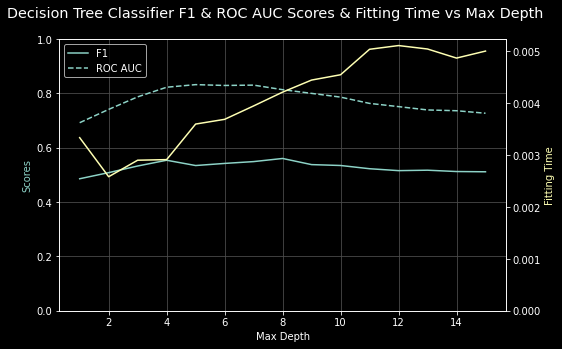

The Best Decision Tree Classifier:
	Fitting Time	0.004
	F1 Score	0.560
	ROC AUC Score	0.814
	Tree Depth	8


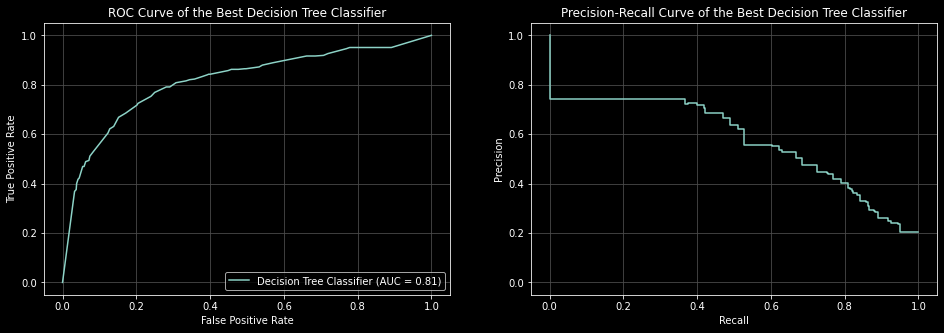

In [76]:
(_, summary.loc[('Down', 'Tree', 'Cut'), ('F1', 'Valid')], 
 summary.loc[('Down', 'Tree', 'Cut'), ('ROC AUC', 'Valid')]) = find_best_model('tree', 
                                                                               _X_train_down, y_train_down, 
                                                                               _X_valid, y_valid)

In [77]:
summary.iloc[:18].style.background_gradient(subset='F1', axis=None).background_gradient(subset='ROC AUC', axis=None)

Downsampling привел к худшим пока метрикам у дерева решений. Однако и здесь на урезанном датасете обе метрики на валидационной выборке выше, чем на полном.

#### Случайный лес

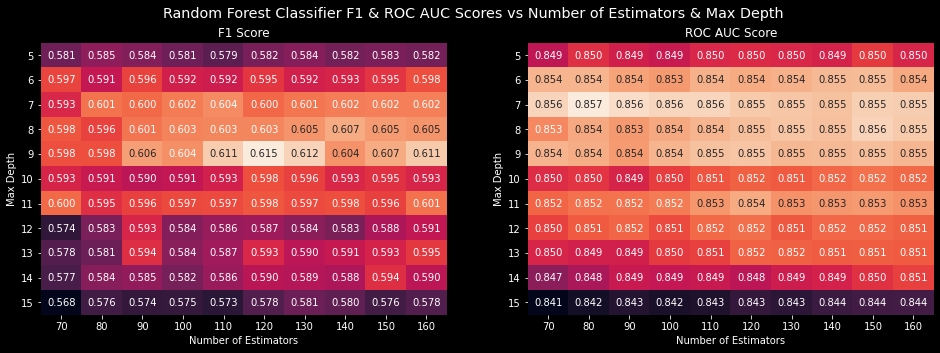

The Best Random Forest Classifier:
	Fitting Time	0.301
	F1 Score	0.615
	ROC AUC Score	0.855
	Number of Trees	120
	Max Tree Depth	9


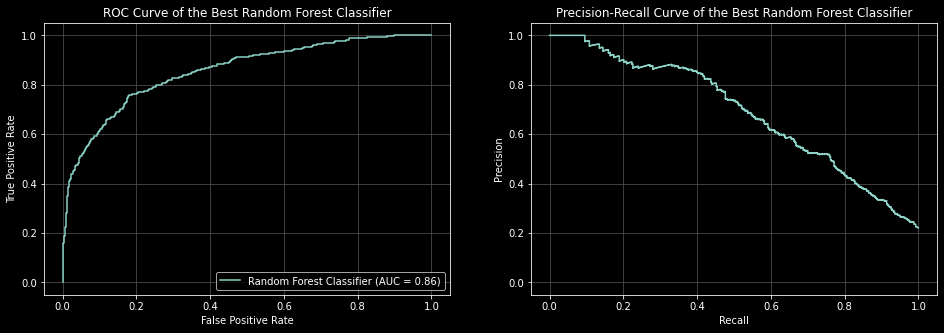

In [78]:
(_, summary.loc[('Down', 'Forest', 'Full'), ('F1', 'Valid')], 
 summary.loc[('Down', 'Forest', 'Full'), ('ROC AUC', 'Valid')]) = find_best_model('forest', 
                                                                                  X_train_down, y_train_down, 
                                                                                  X_valid, y_valid, 
                                                                                  max_depth=range(5, 16), 
                                                                                  n_estimators=range(70, 161, 10))

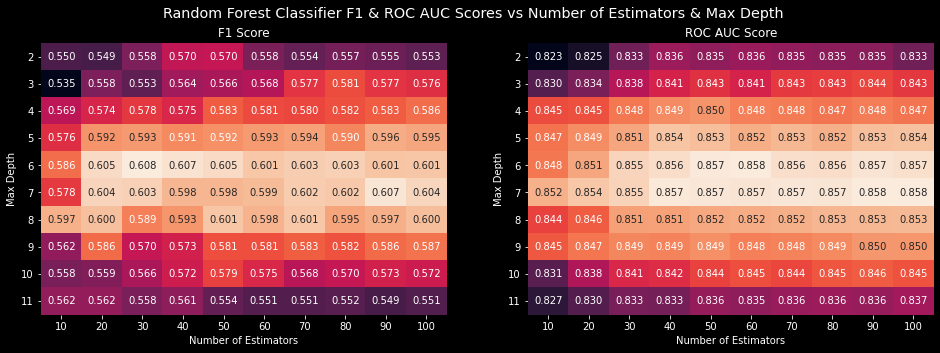

The Best Random Forest Classifier:
	Fitting Time	0.077
	F1 Score	0.608
	ROC AUC Score	0.855
	Number of Trees	30
	Max Tree Depth	6


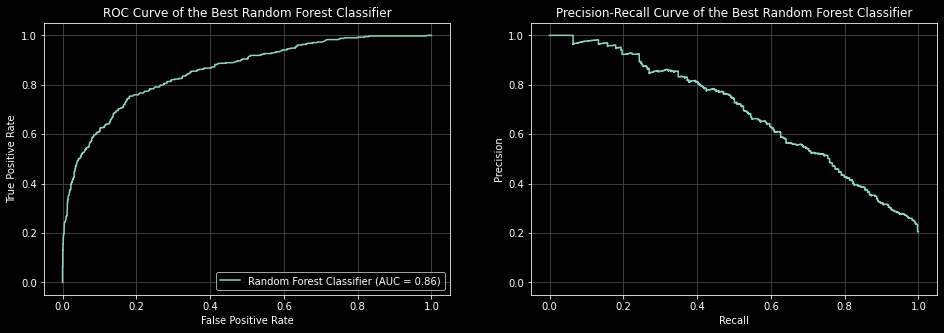

In [79]:
(_, summary.loc[('Down', 'Forest', 'Cut'), ('F1', 'Valid')], 
 summary.loc[('Down', 'Forest', 'Cut'), ('ROC AUC', 'Valid')]) = find_best_model('forest', 
                                                                                 _X_train_down, y_train_down, 
                                                                                 _X_valid, y_valid, 
                                                                                 max_depth=range(2, 12), 
                                                                                 n_estimators=range(10, 101, 10))

In [80]:
summary.iloc[:18].style.background_gradient(subset='F1', axis=None).background_gradient(subset='ROC AUC', axis=None)

Модели случайного леса с даунсемплингом на обоих датасетах показали на валидационной выборке более высокую метрику F1, чем на несбалансированной выборке, но менее высокую, чем при взвешивании классов. Метрика ROC AUC при этом пока рекордно высокая. F1 выше у модели на полном датасете, а ROC AUC – на урезанном.

#### Логистическая регрессия

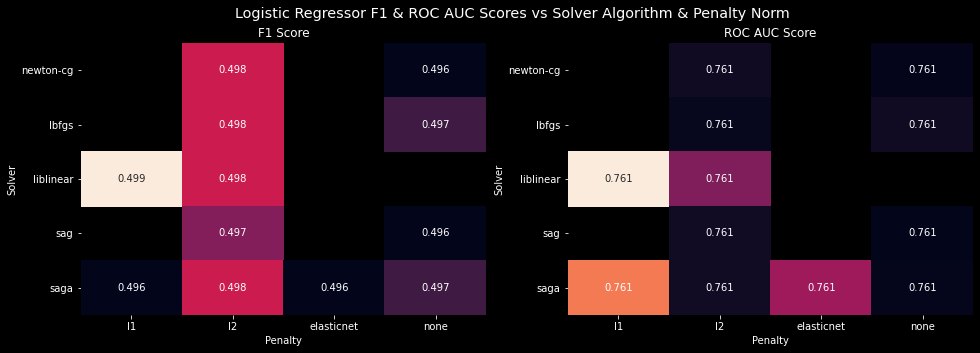

The Best Logistic Regressor:
	Fitting Time	0.007
	F1 Score	0.499
	ROC AUC Score	0.761
	Penalty Norm	l1
	Solver Algo	liblinear


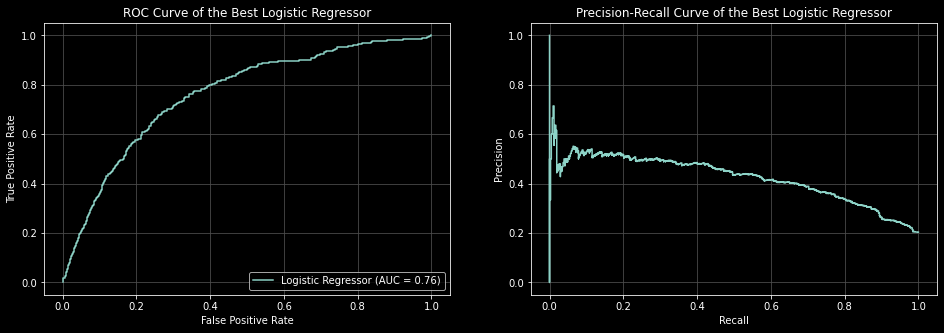

In [81]:
(_, summary.loc[('Down', 'Logit', 'Full'), ('F1', 'Valid')], 
 summary.loc[('Down', 'Logit', 'Full'), ('ROC AUC', 'Valid')]) = find_best_model('logit', 
                                                                                 X_train_down, y_train_down, 
                                                                                 X_valid, y_valid)

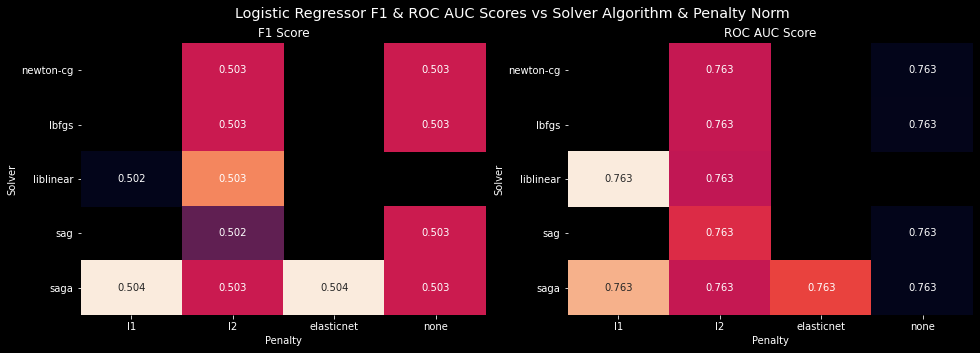

The Best Logistic Regressor:
	Fitting Time	0.203
	F1 Score	0.504
	ROC AUC Score	0.763
	Penalty Norm	l1
	Solver Algo	saga


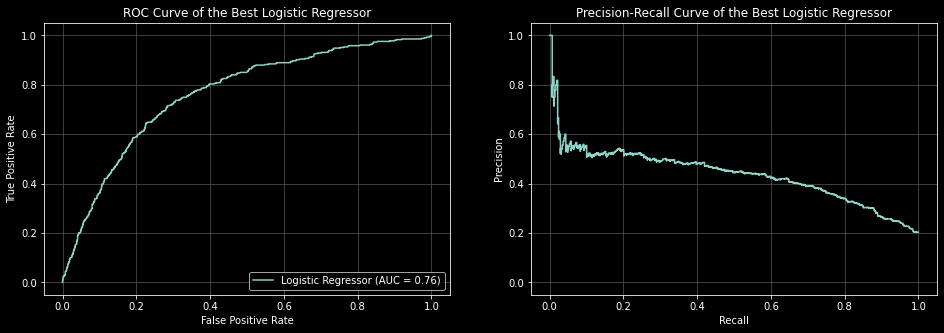

In [82]:
(_, summary.loc[('Down', 'Logit', 'Cut'), ('F1', 'Valid')], 
 summary.loc[('Down', 'Logit', 'Cut'), ('ROC AUC', 'Valid')]) = find_best_model('logit', 
                                                                                _X_train_down, y_train_down, 
                                                                                _X_valid, y_valid)

In [83]:
summary.iloc[:18].style.background_gradient(subset='F1', axis=None).background_gradient(subset='ROC AUC', axis=None)

Downsampling немного улучшил метрики логистической регрессии по сравнению с результатами при взвешивании классов. Метрики модели на урезанном датасете несколько выше, чем на полном.

### Upsampling

Наконец, применим технику upsampling: уравняем частотность классов в обучающей выборке, клонировав необходимое число объектов класса 1. 

In [84]:
N1 = y_train.sum()         # число объектов класса 1
N0 = y_train.count() - N1  # число объектов класса 0
repeats = mt.ceil(N0 / N1) # необходимое число повторений

y_train_up = shuffle(pd.concat([y_train[y_train == 0], 
                                y_train[y_train == 1].repeat(repeats).sample(n=N0, random_state=rs)]),
                     random_state=rs)

X_train_up = X_train.loc[y_train_up.index, :]
_X_train_up = _X_train.loc[y_train_up.index, :]

print(X_train_up.shape, y_train_up.shape)
print(_X_train_up.shape)

(9556, 11) (9556,)
(9556, 7)


Проверим новый баланс классов.

In [85]:
print(y_train_up.mean())

0.5


#### Дерево решений

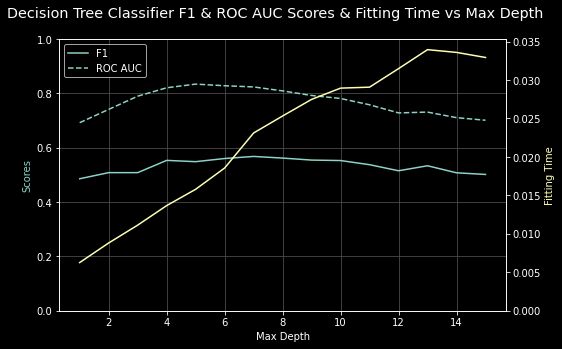

The Best Decision Tree Classifier:
	Fitting Time	0.023
	F1 Score	0.568
	ROC AUC Score	0.824
	Tree Depth	7


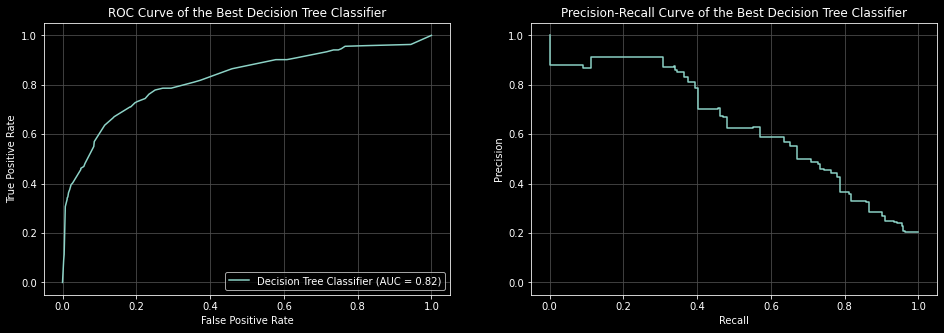

In [86]:
(_, summary.loc[('Up', 'Tree', 'Full'), ('F1', 'Valid')], 
 summary.loc[('Up', 'Tree', 'Full'), ('ROC AUC', 'Valid')]) = find_best_model('tree', 
                                                                              X_train_up, y_train_up, 
                                                                              X_valid, y_valid)

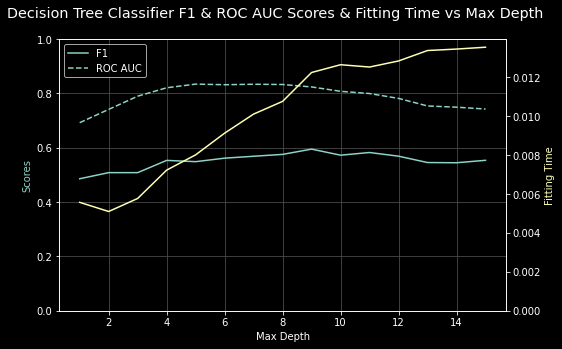

The Best Decision Tree Classifier:
	Fitting Time	0.012
	F1 Score	0.595
	ROC AUC Score	0.824
	Tree Depth	9


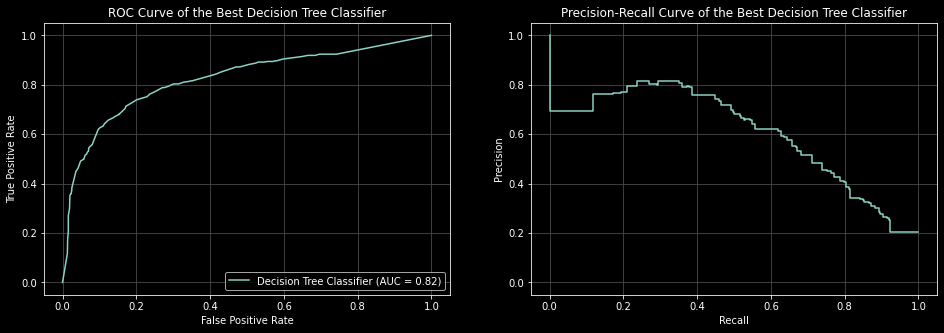

In [87]:
(_, summary.loc[('Up', 'Tree', 'Cut'), ('F1', 'Valid')], 
 summary.loc[('Up', 'Tree', 'Cut'), ('ROC AUC', 'Valid')]) = find_best_model('tree', 
                                                                             _X_train_up, y_train_up, 
                                                                             _X_valid, y_valid)

In [88]:
summary.style.background_gradient(subset='F1', axis=None).background_gradient(subset='ROC AUC', axis=None)

Метрика F1 на урезанном датасете – лучшая среди деревьев, а на полном – вторая с конца. Метрики ROC AUC лучше, чем у деревьев на даунсемплутом трейне, но хуже, чем на взвешенном и невзвешенном.

#### Случайный лес

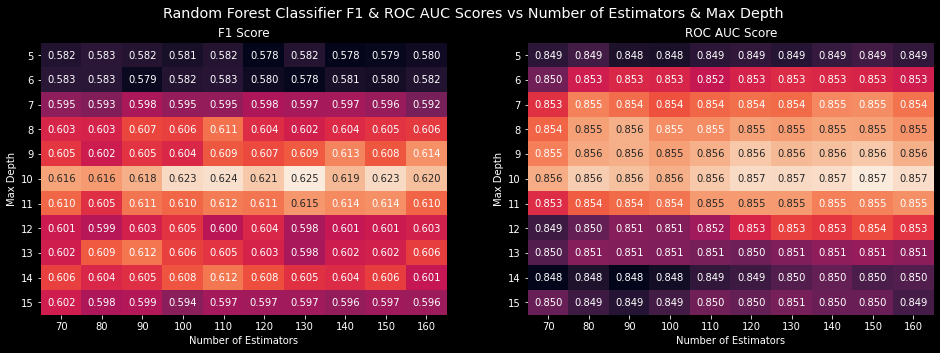

The Best Random Forest Classifier:
	Fitting Time	1.024
	F1 Score	0.625
	ROC AUC Score	0.857
	Number of Trees	130
	Max Tree Depth	10


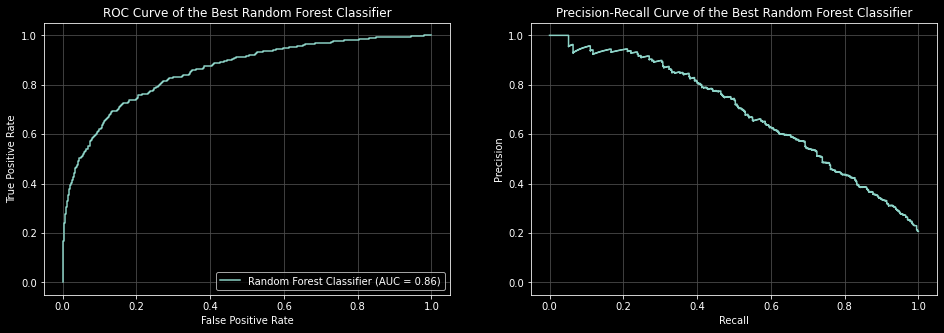

In [89]:
(_, summary.loc[('Up', 'Forest', 'Full'), ('F1', 'Valid')], 
 summary.loc[('Up', 'Forest', 'Full'), ('ROC AUC', 'Valid')]) = find_best_model('forest', 
                                                                                X_train_up, y_train_up, 
                                                                                X_valid, y_valid, 
                                                                                max_depth=range(5, 16), 
                                                                                n_estimators=range(70, 161, 10))

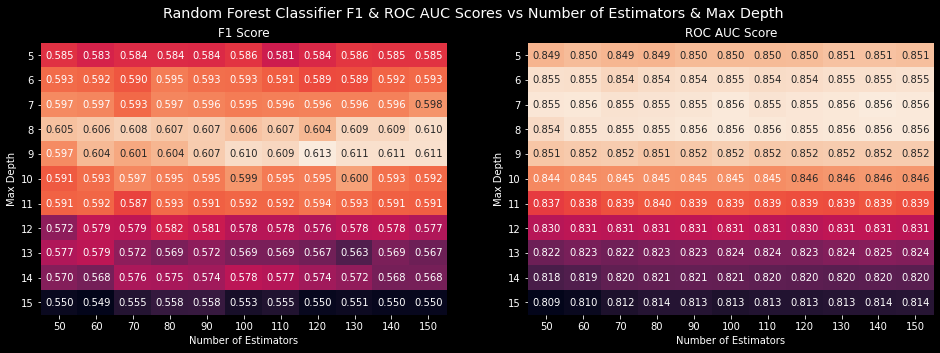

The Best Random Forest Classifier:
	Fitting Time	0.607
	F1 Score	0.613
	ROC AUC Score	0.852
	Number of Trees	120
	Max Tree Depth	9


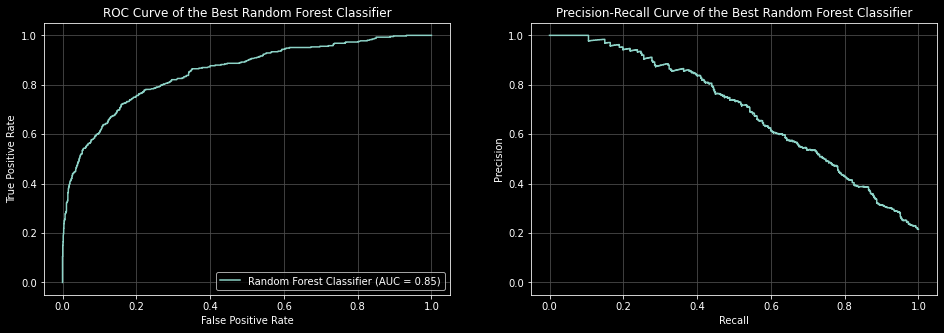

In [90]:
(_, summary.loc[('Up', 'Forest', 'Cut'), ('F1', 'Valid')], 
 summary.loc[('Up', 'Forest', 'Cut'), ('ROC AUC', 'Valid')]) = find_best_model('forest', 
                                                                               _X_train_up, y_train_up, 
                                                                               _X_valid, y_valid, 
                                                                               max_depth=range(5, 16), 
                                                                               n_estimators=range(50, 151, 10))

In [91]:
summary.style.background_gradient(subset='F1', axis=None).background_gradient(subset='ROC AUC', axis=None)

Модели случайного леса с апсемплингом на обоих датасетах показали на валидационной выборке второй результат метрики F1 после моделей со взвешиванием. Метрика ROC AUC на полном датасете – лучшая из всех моделей. Обе метрики выше у модели на полном датасете.

#### Логистическая регрессия

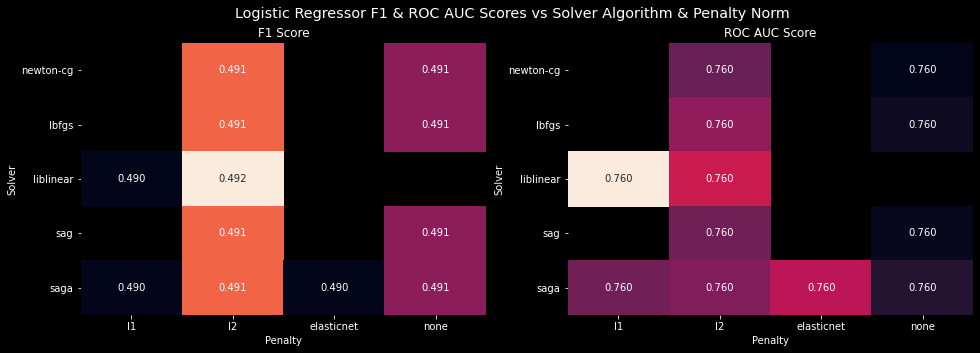

The Best Logistic Regressor:
	Fitting Time	0.111
	F1 Score	0.492
	ROC AUC Score	0.760
	Penalty Norm	l2
	Solver Algo	liblinear


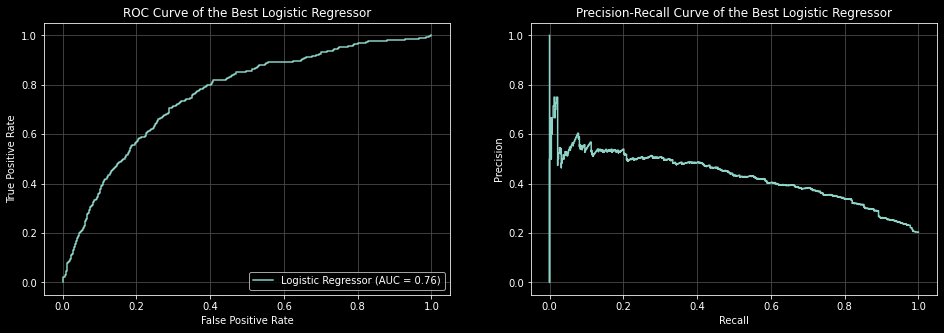

In [92]:
(_, summary.loc[('Up', 'Logit', 'Full'), ('F1', 'Valid')], 
 summary.loc[('Up', 'Logit', 'Full'), ('ROC AUC', 'Valid')]) = find_best_model('logit', 
                                                                               X_train_up, y_train_up, 
                                                                               X_valid, y_valid)

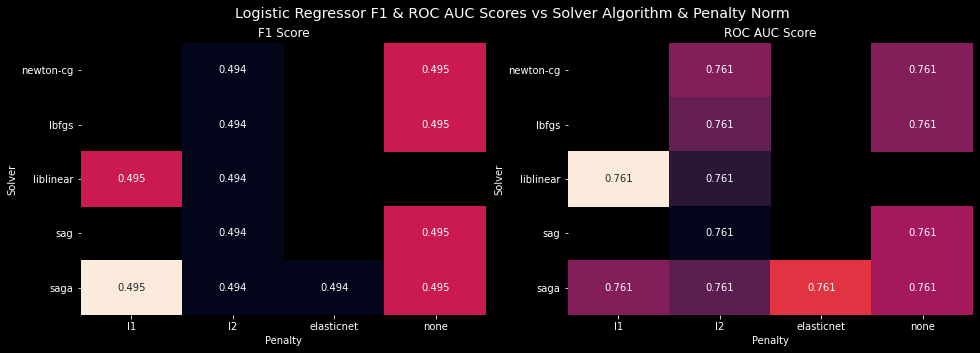

The Best Logistic Regressor:
	Fitting Time	0.269
	F1 Score	0.495
	ROC AUC Score	0.761
	Penalty Norm	l1
	Solver Algo	saga


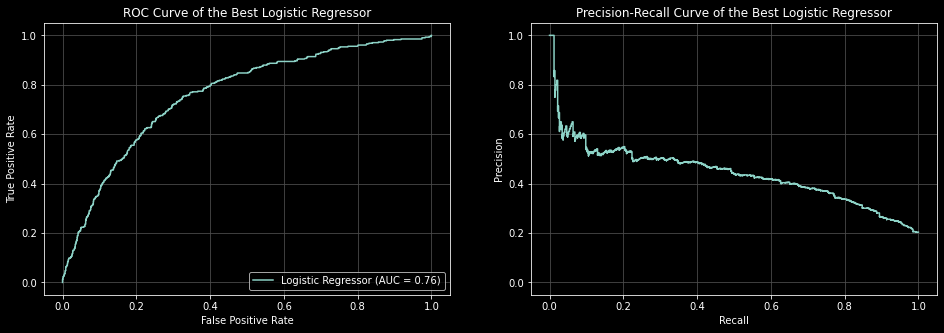

In [93]:
(_, summary.loc[('Up', 'Logit', 'Cut'), ('F1', 'Valid')], 
 summary.loc[('Up', 'Logit', 'Cut'), ('ROC AUC', 'Valid')]) = find_best_model('logit', 
                                                                              _X_train_up, y_train_up, 
                                                                              _X_valid, y_valid)

In [94]:
summary.style.background_gradient(subset='F1', axis=None).background_gradient(subset='ROC AUC', axis=None)

Метрики у логистической регрессии примерно такие же, как при взвешивании классов. Метрики модели на урезанном датасете выше, чем на полном.

## Выбор и тестирование модели

На валидационной выборке самая высокая метрика F1 – 0,6259 – получилась у модели случайного леса из 80 деревьев глубины 10, обученной на полной взвешенной выборке. Самая высокая метрика ROC AUC – 0,8567 – у модели случайного леса из 130 деревьев глубины 10, обученной на полной апсемплутой выборке. Рассчитаем на тестовой выборке метрики эти двух моделей, а заодно и их двойников, обученных на урезанных датасетах.

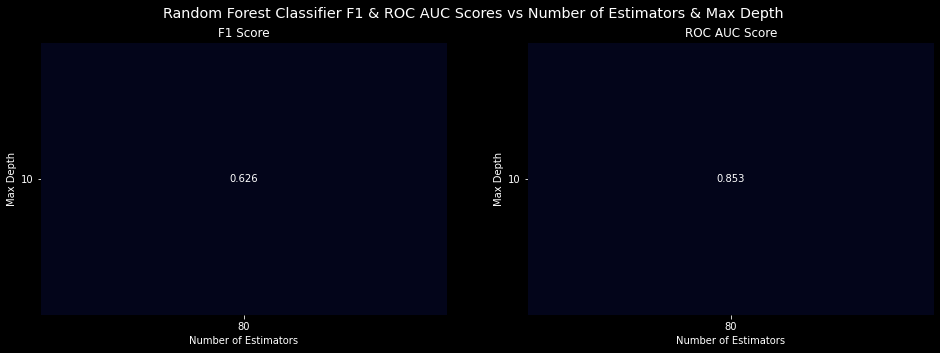

The Best Random Forest Classifier:
	Fitting Time	0.418
	F1 Score	0.619
	ROC AUC Score	0.870
	Number of Trees	80
	Max Tree Depth	10


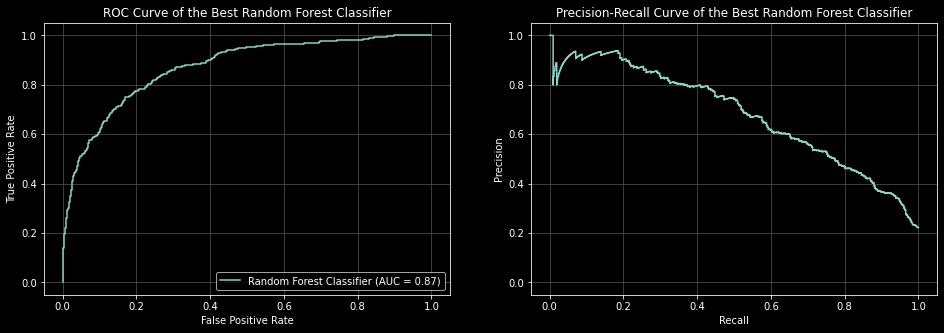

In [95]:
(forest1, summary.loc[('Wght', 'Forest', 'Full'), ('F1', 'Test')], 
 summary.loc[('Wght', 'Forest', 'Full'), ('ROC AUC', 'Test')]) = find_best_model('forest', 
                                                                                 X_train, y_train, 
                                                                                 X_valid, y_valid,
                                                                                 X_test, y_test, 
                                                                                 max_depth=[10], 
                                                                                 n_estimators=[80],
                                                                                 class_weight='balanced')

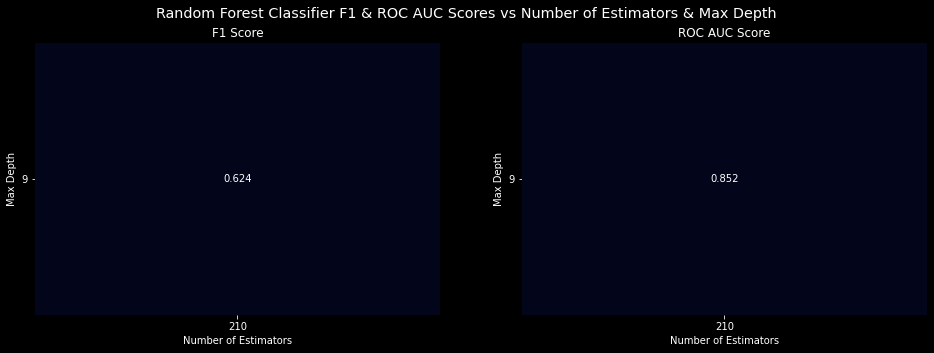

The Best Random Forest Classifier:
	Fitting Time	0.629
	F1 Score	0.626
	ROC AUC Score	0.872
	Number of Trees	210
	Max Tree Depth	9


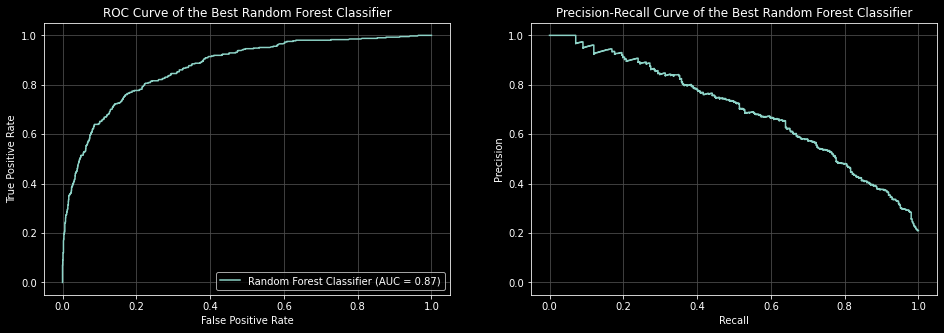

In [96]:
(_forest1, summary.loc[('Wght', 'Forest', 'Cut'), ('F1', 'Test')], 
 summary.loc[('Wght', 'Forest', 'Cut'), ('ROC AUC', 'Test')]) = find_best_model('forest', 
                                                                                _X_train, y_train, 
                                                                                _X_valid, y_valid,
                                                                                _X_test, y_test, 
                                                                                max_depth=[9], 
                                                                                n_estimators=[210],
                                                                                class_weight='balanced')

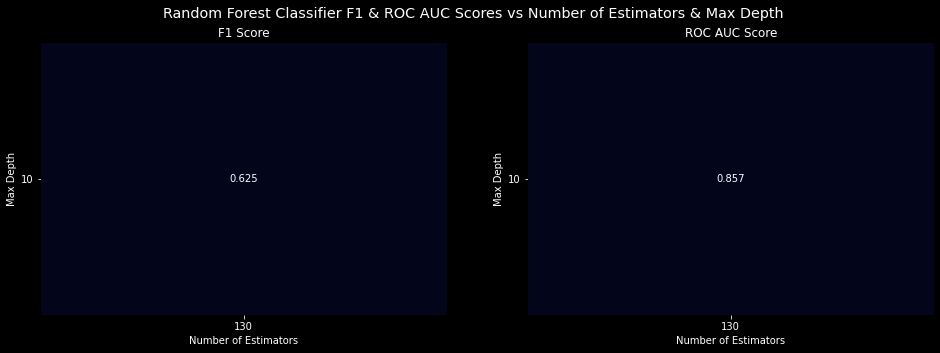

The Best Random Forest Classifier:
	Fitting Time	0.908
	F1 Score	0.617
	ROC AUC Score	0.868
	Number of Trees	130
	Max Tree Depth	10


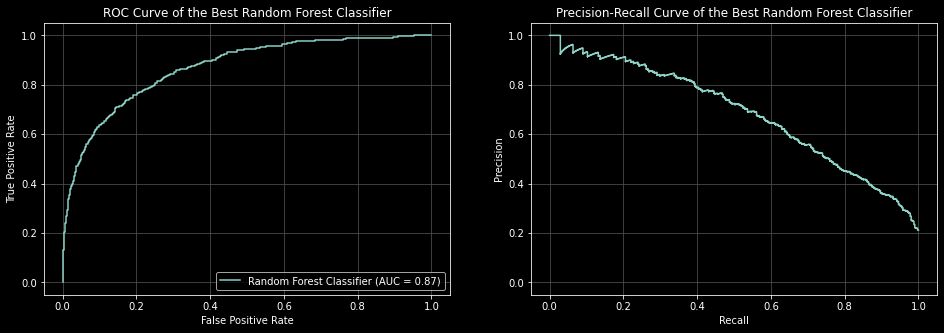

In [97]:
(forest2, summary.loc[('Up', 'Forest', 'Full'), ('F1', 'Test')], 
 summary.loc[('Up', 'Forest', 'Full'), ('ROC AUC', 'Test')]) = find_best_model('forest', 
                                                                               X_train_up, y_train_up, 
                                                                               X_valid, y_valid,
                                                                               X_test, y_test, 
                                                                               max_depth=[10], 
                                                                               n_estimators=[130])

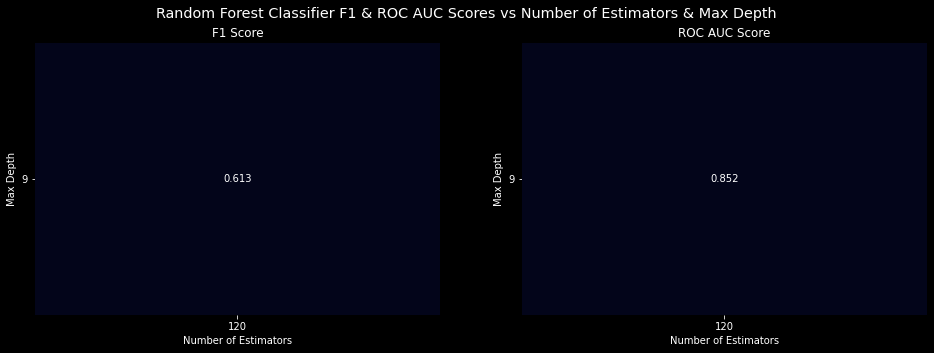

The Best Random Forest Classifier:
	Fitting Time	0.492
	F1 Score	0.625
	ROC AUC Score	0.874
	Number of Trees	120
	Max Tree Depth	9


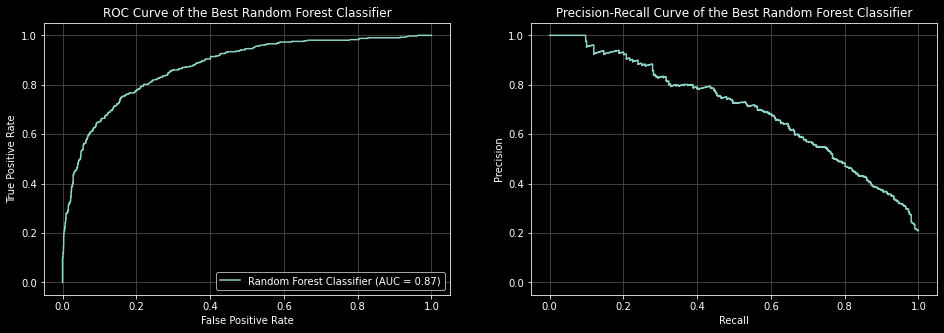

In [98]:
(_forest2, summary.loc[('Up', 'Forest', 'Cut'), ('F1', 'Test')], 
 summary.loc[('Up', 'Forest', 'Cut'), ('ROC AUC', 'Test')]) = find_best_model('forest', 
                                                                              _X_train_up, y_train_up, 
                                                                              _X_valid, y_valid,
                                                                              _X_test, y_test, 
                                                                              max_depth=[9], 
                                                                              n_estimators=[120])

In [99]:
summary.style.background_gradient(subset='F1', axis=None).background_gradient(subset='ROC AUC', axis=None)

Лучшую метрику F1 на тестовой выборке – 0,6265 – и абсолютный рекорд из всех обученных моделей показала модель случайного леса из 210 деревьев глубины 9, обученная на урезанной взвешанной выборке.

Лучшую метрику ROC AUC на тестовой выборке – 0,8735 – и абсолютный рекорд из всех обученных моделей показала модель случайного леса из 120 деревьев глубины 9, обученная на урезанной апсемплутой выборке.

Так как ключевой метрикой у нас является F1, то побеждает первая модель.

Напоследок проверим модель-победителя на адекватность. Для этого посчитаем F1 на тестовой выборке dummy-модели, которая выдает случайный результат с учетом частотности классов в обучающей выборке.

In [100]:
np.random.seed(rs) # инициализируем генератор псевдослучайных чисел

# генерим столбец случайных предсказаний для тестовой выборки,
# в котором доля ушедших клиентов примерно такая же, как в обучающей выборке
y_dummy = np.random.binomial(1, y_train.mean(), len(y_test))

# считаем F1 dummy-предсказаний на тестовой выборке
print(f1_score(y_test, y_dummy))

0.17958179581795816


Такой скоринг никуда не годится – модель-победитель заслужила свой титул по праву.

## Выводы

- Из трех исследованных классификаторов: дерева решений, случайного леса и логистической регрессии – лучшие результаты при любом методе балансировки классов демонстрирует случайный лес
- Взвешивание классов и upsampling на исследованных моделях показывают лучшие результаты, чем downsampling и отсутствие балансировки классов
- Исключение из датасета признаков, которые не коррелируют с целевым, в большинстве случаев идет на пользу модели
- Лучшую F1-меру на тестовой выборке – 0,6265 – и абсолютный рекорд из всех обученных моделей показала модель случайного леса из 210 деревьев глубины 9, обученная на урезанной взвешанной выборке
- Лучшую ROC AUC на тестовой выборке – 0,8735 – и абсолютный рекорд из всех обученных моделей показала модель случайного леса из 120 деревьев глубины 9, обученная на урезанной апсемплутой выборке

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*